##### Data loading

In [1]:
### DATA POINTS ###

# Read from the Log / TensorBoard of "val" designated folder of each model on the hub
# losses of 0 are skipped as these models haven't finished training
NAMES_TO_VAL_LOSSES = {
    "2b84b4b": 3.265024E+00,
    "2b88b4b": 2.995093E+00,
    "2b812b4b": 2.884387E+00,
    "2b816b4b": 2.823208E+00,
    "2b824b4b": 2.752407E+00,
    "2b832b4b": 2.722962E+00,
    "2b840b4b": 2.706547E+00,
    
    # "2b855b4bc4subopt": 2.700284E+00,
    # "2b855b9bsubopt": 2.632432E+00,
    # "2b855b9bc4opt": 2.609009E+00, # Optimal shape; Slightly better loss than the same seed 2b855b9bc4
    # "2b855b4bc4opt1": 2.689857E+00, # Not quite optimal shape, but already better loss
    # "2b855b4bc4opt2": 2.692264E+00, # Not enough regularization so may not hold anymore

    "2b855b11bc4seed1": 2.599277E+00,
    "2b855b11bc4seed2": 2.599763E+00,
    "2b855b11bc4seed3": 2.600254E+00,
    "2b855b11bc4seed4": 2.598042E+00,

    "2b855b14bc4seed1": 2.592292E+00,
    "2b855b14bc4seed2": 2.590478E+00,
    "2b855b14bc4seed3": 2.588968E+00,
    "2b855b14bc4seed4": 2.591426E+00,

    "2b855b18bc4seed1": 2.582283E+00,
    "2b855b18bc4seed2": 2.581189E+00,
    "2b855b18bc4seed3": 2.584074E+00,
    "2b855b18bc4seed4": 2.581949E+00,

    "2b855b1b25c4seed1": 3.425332E+00,
    "2b855b1b25c4seed2": 3.422794E+00,
    "2b855b1b25c4seed3": 3.425154E+00,
    "2b855b1b25c4seed4": 3.428524E+00,


    "2b855b28bc4seed1": 2.575713E+00,
    "2b855b28bc4seed2": 2.576707E+00,
    "2b855b28bc4seed3": 2.574265E+00,
    "2b855b28bc4seed4": 2.575176E+00,

    "2b855b4bc4seed1": 2.693317E+00,
    "2b855b4bc4seed2": 2.691274E+00,
    "2b855b4bc4seed3": 2.692641E+00,
    "2b855b4bc4seed4": 2.692532E+00,

    "2b855b55bc4seed1": 2.569702E+00,
    "2b855b55bc4seed2": 2.568221E+00,
    "2b855b55bc4seed3": 2.569587E+00,
    "2b855b55bc4seed4": 2.570589E+00,

    "2b855b9bc4seed1": 2.609228E+00,
    "2b855b9bc4seed2": 2.605090E+00,
    "2b855b9bc4seed3": 2.605155E+00,
    "2b855b9bc4seed4": 2.606114E+00,

    # "2b855b55bperplexity": 2.604075E+00
    # "2b855b55bdedup": 2.758145E+00,
    # "2b855b55bc4perplexity25": 2.740080E+00, 
    # "2b855b55bc4perplexity50": 2.659265E+00

    # "2b884b84bperplexity25": 2.701157E+00
    # "2b884b84bperplexity50": 2.636081E+00
    # "2b884b84bperplexity2575": 2.612976E+00

    "2b855b1b25": 3.422766E+00,
    "2b855b4b": 2.696432E+00,
    "2b855b9b": 2.611045E+00,
    "2b855b11b": 2.598793E+00,
    "2b855b14b": 2.589427E+00,
    "2b855b18b": 2.584592E+00,
    "2b855b28b": 2.579361E+00,
    "2b855b55b": 2.574117E+00,

    "4b212b12b": 2.848890E+00,
    "4b224b12b": 2.691483E+00,
    "4b236b12b": 2.618343E+00,
    "4b248b12b": 2.577519E+00,
    "4b260b12b": 2.560390E+00,
    "4b272b12b": 2.539524E+00,

    # "4b284b12bsubopt": 2.562510E+00,
    # "4b284b6bsubopt": 2.650107E+00, # Probably worse cuz loss midway goes up (verify in graph)
    # "4b284b12bopt": 2.525244E+00, # Not quite shaped correctly
    # "4b284b6bopt1": 2.641864E+00 # Too many excess params resulting val loss increasing midway, i.e. needs more regularization
    "4b284b12bc4opt2": 2.520537E+00, # Params: 3.089856e9

    "4b284b12bseed1": 2.538173E+00,
    "4b284b12bc4seed2": 2.526042E+00,
    "4b284b12bc4seed3": 2.537281E+00,
    "4b284b12bc4seed4": 2.527790E+00,

    "4b284b17bc4seed1": 2.549558E+00,
    "4b284b17bc4seed2": 2.503345E+00,
    "4b284b17bc4seed3": 2.499933E+00,
    "4b284b17bc4seed4": 2.496040E+00,

    "4b284b1b9c4seed1": 3.118388E+00,
    "4b284b1b9c4seed2": 3.082603E+00,
    "4b284b1b9c4seed3": 3.111291E+00,
    "4b284b1b9c4seed4": 3.146578E+00,

    "4b284b21bc4seed1": 2.502885E+00,
    "4b284b21bc4seed2": 2.480593E+00,
    "4b284b21bc4seed3": 2.491781E+00,
    "4b284b21bc4seed4": 2.477816E+00,

    "4b284b28bc4seed1": 2.479697E+00,
    "4b284b28bc4seed2": 2.482804E+00,
    "4b284b28bc4seed3": 2.477427E+00,
    "4b284b28bc4seed4": 2.494708E+00,

    "4b284b42bc4seed1": 2.470463E+00,
    "4b284b42bc4seed2": 2.491261E+00,
    "4b284b42bc4seed3": 2.469242E+00,
    "4b284b42bc4seed4": 2.469873E+00,

    "4b284b84bc4v2seed1": 2.464149E+00,
    "4b284b84bc4v2seed2": 2.461136E+00,
    "4b284b84bc4v2seed3": 2.480773E+00,
    "4b284b84bc4v2seed4": 2.476263E+00,

    "4b284b6bseed1": 2.602034E+00, 
    "4b284b6bseed2": 2.604310E+00,
    "4b284b6bseed3": 2.609000E+00,
    "4b284b6bseed4": 2.614594E+00,

    # "4b284b84b10c4py": 2.813708E+00,
    # "4b284b84b20c4py": 2.683304E+00
    # "4b284b84b30c4py": 2.613236E+00,
    # "4b284b84b40c4py": 2.568575E+00,
    # "4b284b84b50c4py": 2.535289E+00,
    # "4b284b84b60c4py": 2.509820E+00,
    # "4b284b84b70c4py": 2.491829E+00,
    # "4b284b84b80c4py": 2.479359E+00,
    # "4b284b84b90c4py": 2.462060E+00,

    # "4b284bc4perplexity": 2.496036E+00,
    # "4b284bc4perplexity25": 2.624402E+00,
    # "4b284bc4perplexity50": 2.539634E+00
    # "4b284bc4dedup": 2.687236E+00,

    "4b284b1b9": 3.276627E+00,
    "4b284b6b": 2.639410E+00,
    "4b284b12b": 2.526961E+00,
    "4b284b17b": 2.485060E+00,
    "4b284b21b": 2.471375E+00,
    "4b284b28b": 2.467156E+00,
    "4b284b42b": 2.470016E+00,
    "4b284b84b": 2.456530E+00,


    "8b7178b25bopt": 2.358995E+00,

    "8b7178b25b": 2.376484E+00,
    "8b7178b35b": 2.360029E+00,
    "8b7178b44b": 2.351177E+00,
    "8b7178b58b": 2.348107E+00,
    "8b7178b88b": 2.337275E+00,
    "8b7178b178b": 2.336741E+00,

    "7m100m100m": 8.107364E+00, # MassiveW optimal one
    "7m200m100m": 7.362360E+00,

    "1b1100m100m": 6.611002E+00,
    "2b8100m100m": 7.518863E+00,

    "14m100m100m": 7.278144E+00, # C4 optimal one
    "20m400m400m": 6.096268E+00,
    "25m400m400m": 5.794130E+00, # MassiveW optimal one
    
    "25m200m100m": 6.252892E+00,
    "25m400m100m": 5.799587E+00,
    "25m800m100m": 5.284175E+00,

    "14m200m100m": 6.664138E+00,
    "14m400m100m": 6.273184E+00,
    "14m800m100m": 5.816824E+00,

    "14m1b5100m": 5.364749E+00,
    "14m2b7100m": 4.992776E+00,
    "14m3b9100m": 4.741132E+00,
    "14m5b9100m": 4.546227E+00,
    "14m7b5100m": 4.472296E+00,
    "14m14b100m": 4.383392E+00,
    "14m20b100m": 4.510410E+00, ### DOUBLE DESCENT ###
    "14m91b100m": 4.396074E+00,
    "14m174b100m": 4.359691E+00,
    "14m300b100m": 4.369110E+00, ### DOUBLE DESCENT ###
    "14m600b100m": 4.331469E+00,
    "14m900b100m": 4.304018E+00,

    "44m200m100m": 6.189970E+00,
    "44m400m100m": 5.648868E+00,

    "44m1b5100m": 4.387672E+00,
    "44m2b7100m": 4.113597E+00,
    "44m3b9100m": 3.988205E+00,
    "44m5b9100m": 3.894340E+00,
    "44m7b5100m": 3.854261E+00,
    "44m14b100m": 3.807672E+00,
    "44m20b100m": 3.929030E+00, ### DOUBLE DESCENT ###
    "44m32b100m": 3.892240E+00,
    "44m91b100m": 3.836200E+00,
    "44m174b100m": 3.812315E+00,

    "83m1b51b5": 4.362080E+00, # MassiveW optimal one

    "196m1b51b5": 3.929866E+00, # C4 optimal one

    "1b11b51b5": 3.680017E+00,
    "1b11b5400m": 3.704141E+00,
    "1b11b5100m": 3.819042E+00,

    "1b12b7100m": 4.097820E+00,
    "1b13b9100m": 4.834920E+00,
    "1b15b9100m": 6.013517E+00,
    "1b17b5100m": 6.742290E+00,

    "619m2b72b7": 3.415532E+00,
    "619m2b71b5": 3.409955E+00,
    "619m2b7400m": 3.449187E+00,
    "619m2b7100m": 3.829336E+00,

    "619m1b5100m": 3.784308E+00,
    "619m3b9100m": 4.152834E+00,
    "619m5b9100m": 4.668028E+00,
    "619m7b5100m": 5.001218E+00,

    "421m3b93b9": 3.348126E+00,
    "421m3b91b5": 3.354960E+00,
    "421m3b9400m": 3.404755E+00,
    "421m3b9100m": 3.898620E+00,

    "421m1b5100m": 3.797898E+00,
    "421m2b7100m": 3.747371E+00,
    "421m5b9100m": 4.169935E+00,
    "421m7b5100m": 4.376178E+00,

    "280m5b95b9": 3.319542E+00,
    "280m5b91b5": 3.330755E+00,
    "280m5b9400m": 3.386692E+00,
    "280m5b9100m": 3.882211E+00,

    "280m1b5100m": 3.877228E+00,
    "280m2b7100m": 3.727590E+00,
    "280m3b9100m": 3.754965E+00,
    "280m7b5100m": 3.993410E+00,
    "280m91b400m": 3.312059E+00,

    "220m7b57b5": 3.310159E+00,
    "220m7b51b5": 3.325092E+00,
    "220m7b5400m": 3.374362E+00,
    "220m7b5100m": 3.848433E+00,

    "220m1b5100m": 3.932167E+00,
    "220m2b7100m": 3.752793E+00,
    "220m3b9100m": 3.721901E+00,
    "220m5b9100m": 3.780970E+00,

    "220m3b9100mdedup": 3.863982E+00,

    "146m14b14b": 3.319729E+00,
    "146m14b1b5": 3.334061E+00,
    "146m14b400m": 3.390927E+00,
    "146m14b100m": 3.801428E+00, ### DOUBLE DESCENT

    "146m60b400m": 3.340250E+00,
    "146m91b400m": 3.311519E+00,
    "146m174b400m": 3.277013E+00,

    "146m1b5100m": 4.033501E+00,
    "146m2b7100m": 3.807640E+00,
    "146m3b9100m": 3.732758E+00,
    "146m5b9100m": 3.718068E+00, # Best model for 100M; to FLOPS: 6 * 146M * 5.9B = 5.0622e+18
    "146m7b5100m": 3.735044E+00,
    "146m20b100m": 3.756257E+00,
    "146m32b100m": 3.793078E+00,
    "146m60b100m": 3.846421E+00,
    "146m91b100m": 3.862952E+00,
    "146m174b100m": 3.897418E+00,

    "146m1b5100mdedup": 4.169387E+00,
    "146m2b7100mdedup": 3.949182E+00,
    "146m3b9100mdedup": 3.871975E+00,
    "146m5b9100mdedup": 3.860607E+00,
    "146m7b5100mdedup": 3.883653E+00,
    "146m14b100mdedup": 3.963449E+00, ### WEAK DOUBLE DESCENT ###
    "146m32b100mdedup": 3.962464E+00,
    "146m60b100mdedup": 4.017775E+00,
    "146m91b100mdedup": 4.065124E+00,
    "146m174b100mdedup": 4.094653E+00,

    "83m20b20b": 3.608018E+00,
    "83m20b1b5": 3.618937E+00,
    "83m20b400m": 3.651057E+00,
    "83m20b100m": 3.790125E+00, ### DOUBLE DESCENT ###

    "83m400m100m": 5.488318E+00,
    "83m1b5100m": 4.206960E+00,
    "83m2b7100m": 3.953894E+00,
    "83m3b9100m": 3.844048E+00,
    "83m5b9100m": 3.774708E+00,
    "83m7b5100m": 3.747734E+00,
    "83m14b100m": 3.725231E+00,
    "83m32b100m": 3.747091E+00,
    "83m60b100m": 3.747091E+00,
    "83m91b100m": 3.743505E+00,
    "83m174b100m": 3.734349E+00,
    "83m300b100m": 3.868704E+00,

    "83m14b100mdedup": 3.872943E+00,

    "2b84b84b8": 3.236253E+00,
    "2b84b81b5": 3.244249E+00,
    "2b84b8400m": 3.378791E+00,
    "2b84b8100m": 5.340819E+00,

    "1b58b88b8": 3.022525E+00,
    "1b58b84b8": 3.022745E+00,
    "1b58b81b5": 3.070052E+00,
    "1b58b8400m": 3.479142E+00,
    "1b58b8100m": 7.679766E+00,

    "1b112b12b": 2.925644E+00,
    "1b112b4b8": 2.927054E+00,
    "1b112b1b5": 2.996886E+00,
    "1b112b400m": 3.547616E+00,
    "1b112b100m": 8.136283E+00,

    "619m22b22b": 2.900172E+00,
    "619m22b4b8": 2.912009E+00,
    "619m22b1b5": 2.973545E+00, # Best model for 1.5b; To FLOPS: 6 * 619M * 22B = 8.1708e+19
    "619m22b400m": 3.441785E+00,
    "619m22b100m": 6.840158E+00,

    "619m60b400m": 3.688865E+00,
    "619m91b400m": 3.756154E+00,

    "421m32b32b": 2.912103E+00,
    "421m32b4b8": 2.926206E+00,
    "421m32b1b5": 2.980892E+00,
    "421m32b400m": 3.366502E+00,
    "421m32b100m": 5.783605E+00,

    "421m60b400m": 3.431953E+00,
    "421m91b400m": 3.465185E+00,

    "421m91b1b5": 2.917592E+00,
    "421m250b1b5": 2.890927E+00,
    "421m300b1b5": 2.884335E+00,

    "221m60b60b": 2.981407E+00,
    "221m60b4b8": 2.993185E+00, 
    "221m60b1b5": 3.032319E+00,
    "221m60b400m": 3.258704E+00,

    "221m3b9400m": 3.525297E+00,
    "221m32b400m": 3.260515E+00,
    "221m91b400m": 3.261209E+00,
    "221m174b400m": 3.260720E+00,
    "221m300b400m": 3.257426E+00,
    "221m600b400m": 3.261908E+00,

    "8b712b12b": 3.140306E+00,
    "8b712b1b5": 3.063302E+00,
    "8b712b400m": 4.538278E+00,
    "8b712b100m": 7.385309E+00,

    "3b926b26b": 2.916993E+00,
    "3b926b12b": 2.947956E+00,
    "3b926b1b5": 3.020170E+00,
    "3b926b400m": 0,
    "3b926b100m": 0,

    "2b836b36b": 2.618932E+00,
    "2b836b12b": 2.636968E+00,
    "2b836b1b5": 3.065092E+00,
    "2b836b400m": 6.548141E+00,
    "2b836b100m": 1.069564E+01,

    "2b246b46b": 2.603919E+00,
    "2b246b12b": 2.638341E+00,
    "2b246b1b5": 3.029574E+00,
    "2b246b400m": 5.896346E+00,
    "2b246b100m": 1.087606E+01,

    "1b566b66b": 2.592968E+00,
    "1b566b12b": 2.626113E+00,
    "1b566b1b5": 2.992921E+00,
    "1b566b400m": 0,
    "1b566b100m": 1.101838E+01,

    "1b191b91b": 2.636805E+00,
    "1b191b12b": 2.665932E+00,
    "1b191b400m": 4.618763E+00,
    "1b191b1b5": 2.939082E+00,

    "574m174b174b": 2.708514E+00,
    "574m174b12b": 2.738098E+00,
    "574m174b1b5": 2.895393E+00,
    "574m174b400m": 3.752652E+00,

    "220m200b1b5": 0,
    "220m250b1b5": 0,
    "220m300b1b5": 2.958765E+00,
    "220m600b1b5": 2.937761E+00,
    "220m900b1b5": 0,

    "574m200b1b5": 0,
    "574m250b1b5": 0,
    "574m300b1b5": 2.881076E+00,
    "574m600b1b5": 2.863888E+00,

    "1b1174b1b5": 2.974257E+00,
    "1b1250b1b5": 2.986145E+00,

    "1b591b1b5": 3.034805E+00,
    "1b5174b1b5": 3.099245E+00,

    "2b266b1b5": 0,
    "2b291b1b5": 3.176858E+00,
    "2b2174b1b5": 3.351022E+00,

    "8b720b1b5": 3.084724E+00,
    "2b877b1b5": 3.297776E+00,

}

TOKENS_MAP = {
    "100m": 0.1,
    "200m": 0.2,
    "400m": 0.4,
    "800m": 0.8,
    "1b25": 1.25,
    "1b5": 1.5,
    "1b9": 1.9,
    "2b7": 2.7,
    "2b8": 2.8,
    "3b9": 3.9,
    "5b9": 5.9,
    "7b5": 7.5,
    "14b": 14,
    "20b": 20,
    "174b": 174,    
}

PARAMS_MAP = {
    "7m": 7.098752E+06,
    "14m": 1.41E+07,
    "20m": 19.703712E+06,
    "25m": 35.5E+06,
    "44m": 4.4E+07,
    "83m": 8.27E+07,    
    "146m": 1.465E+08,
    "196m": 201.236224E+06,
    "220m": 2.205E+08,
    "221m": 2.205E+08,
    "280m": 2.81E+08,
    "421m": 4.212E+08,
    "574m": 573.7E+06,
    "619m": 6.187E+08,
    "1b1": 1.0963E+09,     
    "1b5": 1.5173E+09,
    "2b2": 2.160013824E+09,
    "2b8": 2.81E+09,
    "3b8": 3.581186048E+09,
    "3b9": 3.89971072E+09,
    "4b2": 4.2465E+09,
    "8b7": 8.67E+09,
}


In [2]:
import numpy as np
import matplotlib.pyplot as plt

model_params = []
tokens = []
unique_tokens = []
losses = []
names = []

def get_params(name):
    idx = 2
    while name[:idx] not in PARAMS_MAP:
        idx += 1
    params = PARAMS_MAP[name[:idx]]

    return params, idx


def get_unique_tokens(name):
    idx = -4 if (name[-1] in ("b", "m")) or ((name[-1] not in ("b", "m")) and (name[-2] not in ("b", "m"))) else -3
    ut = name[idx:]
    while (ut.count("b") > 1) or (ut.count("m") > 1):
        idx += 1
        ut = name[idx:]
    if ut in TOKENS_MAP:
        ut = TOKENS_MAP[ut]
    else:
        ut = float(ut.replace("b", ".").strip("."))
    
    if name == "2b855b1b25":
      print(name[idx:])

    return ut * 1e9, idx

def get_tokens(tokens):
    if tokens in TOKENS_MAP:
        tokens = TOKENS_MAP[tokens]
    else:
        tokens = float(tokens.replace("b", ".").strip("."))

    return tokens * 1e9 # Defined in billions

for name, loss in NAMES_TO_VAL_LOSSES.items():
    if loss != 0 and not(name.endswith("dedup")) and not("seed" in name) and not("opt" in name):
        p, tok_start_idx = get_params(name)
        ut, tok_end_idx = get_unique_tokens(name)
        t = get_tokens(name[tok_start_idx:tok_end_idx])

        model_params.append(p)
        unique_tokens.append(ut)
        tokens.append(t)
        losses.append(loss)

        names.append(name)

        print(name, p, t, ut, loss)



2b84b4b 2810000000.0 4000000000.0 4000000000.0 3.265024
2b88b4b 2810000000.0 8000000000.0 4000000000.0 2.995093
2b812b4b 2810000000.0 12000000000.0 4000000000.0 2.884387
2b816b4b 2810000000.0 16000000000.0 4000000000.0 2.823208
2b824b4b 2810000000.0 24000000000.0 4000000000.0 2.752407
2b832b4b 2810000000.0 32000000000.0 4000000000.0 2.722962
2b840b4b 2810000000.0 40000000000.0 4000000000.0 2.706547
1b25
2b855b1b25 2810000000.0 55000000000.0 1250000000.0 3.422766
2b855b4b 2810000000.0 55000000000.0 4000000000.0 2.696432
2b855b9b 2810000000.0 55000000000.0 9000000000.0 2.611045
2b855b11b 2810000000.0 55000000000.0 11000000000.0 2.598793
2b855b14b 2810000000.0 55000000000.0 14000000000.0 2.589427
2b855b18b 2810000000.0 55000000000.0 18000000000.0 2.584592
2b855b28b 2810000000.0 55000000000.0 28000000000.0 2.579361
2b855b55b 2810000000.0 55000000000.0 55000000000.0 2.574117
4b212b12b 4246500000.0 12000000000.0 12000000000.0 2.84889
4b224b12b 4246500000.0 24000000000.0 12000000000.0 2.69148

In [3]:
for t, ut, m, l, n in zip(tokens, unique_tokens, model_params, losses, names):
    if ut > t:
        raise ValueError(n)

##### Plot

In [4]:
### CHINCHILLA ###

import numpy as np

# a, b, e, alpha, beta = [6.007337896264272, 6.016157159698354, 0.5247285289349821, 0.34, 0.28] # MW
a, b, e, alpha, beta = [6.255414, 7.3049974, 0.6254804, 0.3526596, 0.3526596]

A = np.exp(a)
B = np.exp(b)
E = np.exp(e)
G = ((alpha*A)/(beta*B))**(1/(alpha+beta))

def optimal_N(C):
    a = (beta)/(alpha+beta)
    N_opt = G*(C/6)**a
    return N_opt

def N_to_C(N):
    a = (beta)/(alpha+beta)
    C = ((N/G) ** (1/a)) * 6
    return C
  
def optimal_D(C):
    b = (alpha)/(alpha+beta)
    D_opt = (1/G)*(C/6)**b
    return D_opt

def D_to_C(D):
    b = (alpha)/(alpha+beta)
    C = ((G*D) ** (1/b)) * 6
    return C

def loss_fn(N, D):
    L = E + A/(N**alpha) + B/(D**beta)
    return L


func = r"$L(N,D,EP,NP)=E + \frac{A}{(UN + UN * N^* * (1 - e^{(-1*NP/(N^*))}))^\alpha} + \frac{B}{(U + U * EP^* * (1 - e^{(-1*EP/(EP^*))}))^\beta}$"
params = [6.255414, 7.3049974, 0.6254804, 0.3526596, 0.3526596, 15.387756, 5.309743]

def scaling_law(N, D, U, params):
    a, b, e, alpha, beta, rd_star, rn_star  = params
    A = np.exp(a)
    B = np.exp(b)
    E = np.exp(e)

    RD = np.maximum((D / U) - 1, 0)    
    UN = np.minimum(N,optimal_N(D_to_C(U)))
    RN = np.maximum((N / UN ) - 1, 0)

    L = E + A/(UN + UN*rn_star*(1-np.exp(-1*RN/rn_star)))**alpha + B / (U + U * rd_star * (1 - np.exp(-1*RD/(rd_star))))**beta
    return L



9.25955994673152e+21
9.20765244966912e+21


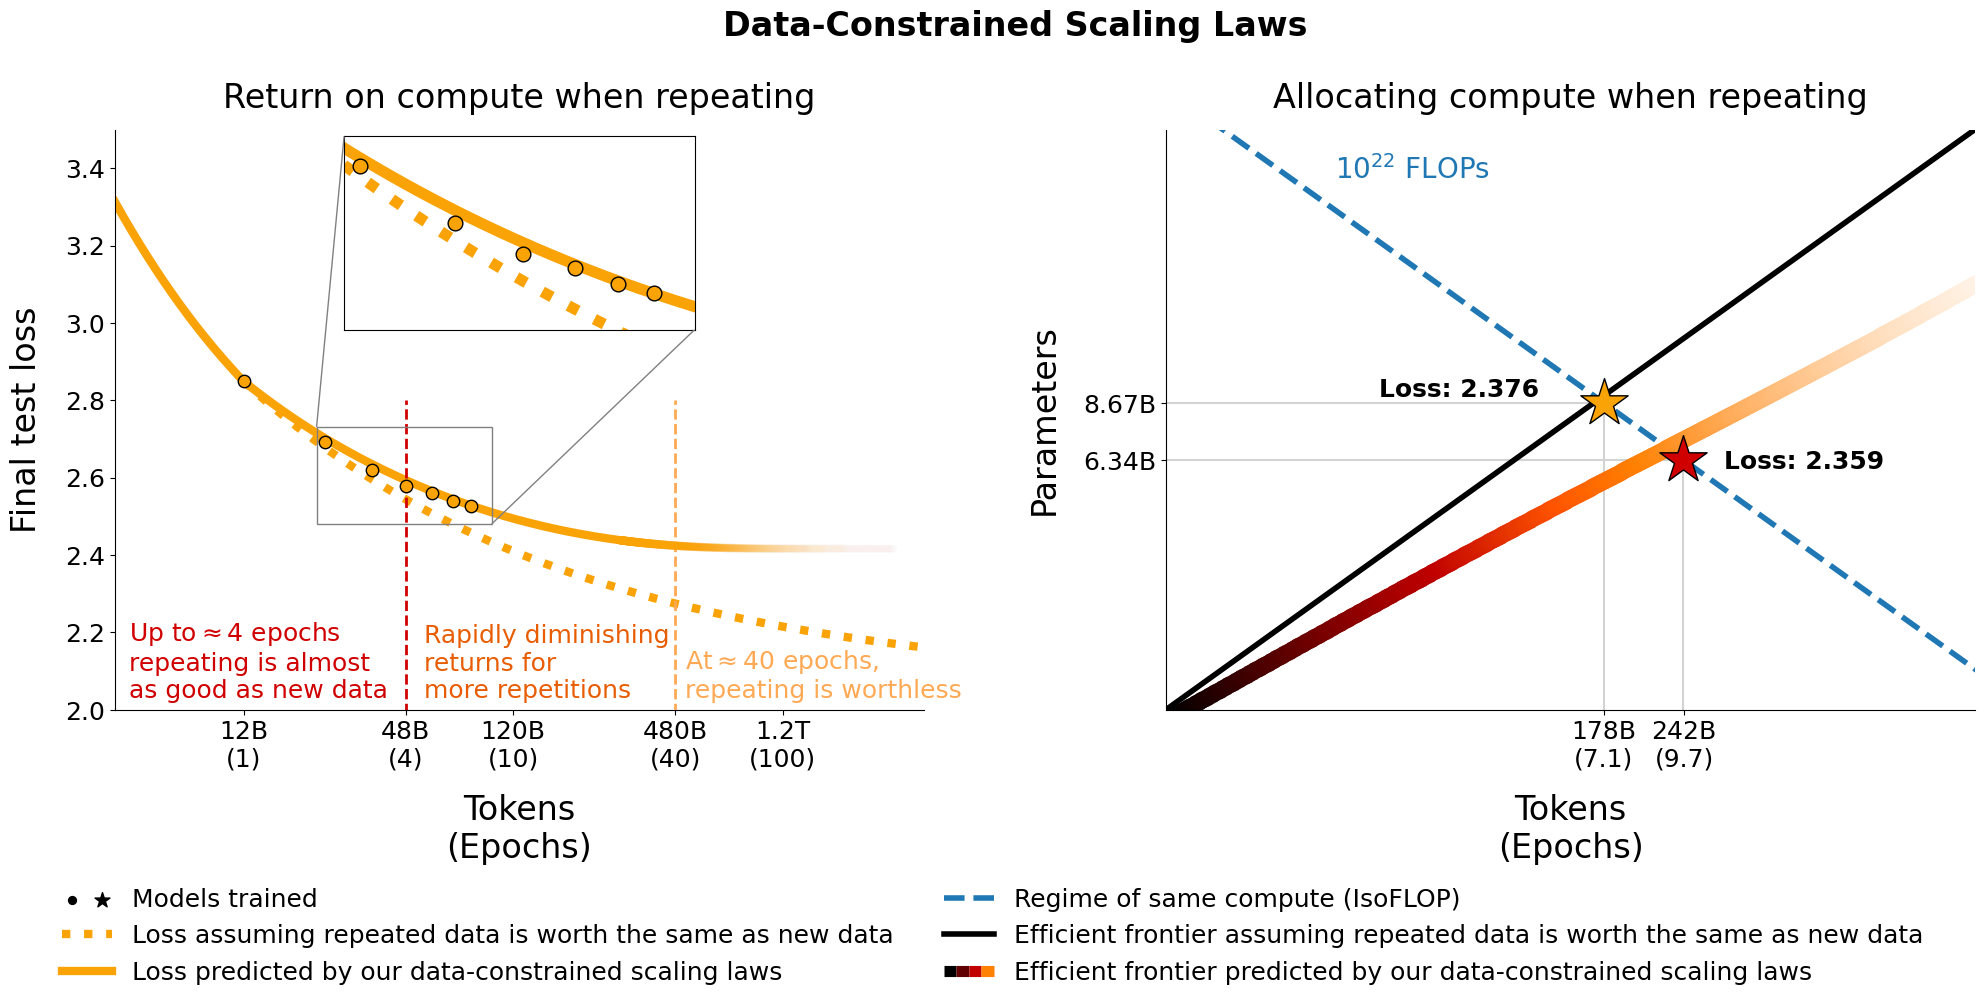

In [5]:
from matplotlib.cm import unregister_cmap
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


random.seed(42)
np.random.seed(42)

FONTSIZE = 24
FONTSIZE_SMALL = 16 + 2

fig, axes = plt.subplots(figsize=(24, 10), ncols=2)

ax_rtn = axes[0]
ax = axes[1]

ax_rtn.set_title(r'Return on compute when repeating', fontsize=FONTSIZE, pad=16)
ax.set_title(r'Allocating compute when repeating', fontsize=FONTSIZE, pad=16)

fig.suptitle('Data-Constrained Scaling Laws', fontsize=FONTSIZE, fontweight="bold", y=1)
 
COLS = [
    "#D00000",
    "#E85D04",
    "#FAA307",
]


UT = 12e9

####################

x = np.linspace(1e9, 100e12, 10000)
x = np.logspace(np.log10(1e9), np.log10(100e12), 10000)
fm = sorted([(t, l) for t, ut, m, l, n in zip(tokens, unique_tokens, model_params, losses, names) if ((m == PARAMS_MAP["4b2"]) and (ut == UT))])

new_start_point = NAMES_TO_VAL_LOSSES["4b212b12b"]# 2.848890E+00 # "4b212b12b"
new_end_point = NAMES_TO_VAL_LOSSES["4b284b84b"]#2.456530E+00 # "4b284b84b"

start_point = loss_fn(PARAMS_MAP["4b2"], 12e9)
end_point = loss_fn(PARAMS_MAP["4b2"], 84e9)

# https://stackoverflow.com/questions/929103/convert-a-number-range-to-another-range-maintaining-ratio
old_range = start_point - end_point
new_range = new_start_point - new_end_point

new_cc_values = [
    (((loss_fn(PARAMS_MAP["4b2"], i[0]) - end_point) * new_range) / old_range) + new_end_point for i in fm
]

new_cc_curve = [
    (((loss_fn(PARAMS_MAP["4b2"], i) - end_point) * new_range) / old_range) + new_end_point for i in x
]

new_start_point = NAMES_TO_VAL_LOSSES["4b212b12b"]#2.848890 # "4b212b12b"
new_end_point = NAMES_TO_VAL_LOSSES["4b284b12b"]#2.526961 # "4b284b12b"

start_point = scaling_law(PARAMS_MAP["4b2"], 12e9, 12e9, [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363])
end_point = scaling_law(PARAMS_MAP["4b2"], 84e9, 12e9, [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363])

# https://stackoverflow.com/questions/929103/convert-a-number-range-to-another-range-maintaining-ratio
old_range = start_point - end_point
new_range = new_start_point - new_end_point
    
new_dc_values = [
    (((scaling_law(PARAMS_MAP["4b2"], i[0], min(i[0], 12e9), [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363]) - end_point) * new_range) / old_range) + new_end_point for i in fm
]

new_dc_curve = [
    (((scaling_law(PARAMS_MAP["4b2"], i, min(i, 12e9), [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363]) - end_point) * new_range) / old_range) + new_end_point for i in x    
]


x_ticks = [100e5, 100e6, 100e7, 100e8, 100e9, 100e10, 100e11, 100e12]
#x_ticks_loc = [np.log10(x) for x in x_ticks]
x_ticks_str = ["$10^{7}$", "$10^{8}$", "$10^{9}$", "$10^{10}$", "$10^{11}$", "$10^{12}$", "$10^{13}$", "$10^{14}$"]
x_ticks_str = ["10M", "100M", "1B", "10B", "100B", "1T", "10T", "100T"]

x_ticks = [12e9, 48e9, 120e9, 480e9, 1.2e12]
x_ticks_str = ["12B\n(1)", "48B\n(4)", "120B\n(10)", "480B\n(40)", "1.2T\n(100)"]
x_ticks = [np.log10(x) for x in x_ticks]
ax_rtn.set_xticks(x_ticks, x_ticks_str)


#ax_rtn.set_xlim(np.log10(1e9), np.log10(10e12))
ax_rtn.set_xlim(np.log10(4e9), np.log10(4e12))
ax_rtn.set_ylim(2.0, 3.5)

ax_rtn.set_xlabel("Tokens\n(Epochs)", fontsize=FONTSIZE, labelpad=16)
ax_rtn.set_ylabel("Final test loss", fontsize=FONTSIZE, labelpad=16)

ax_rtn.scatter(
    np.log10([x[0] for x in fm if x[0] != 84e9]),
    #[x[0] for x in fm],
    [x[1] for x in fm if x[0] != 84e9], 
    label=r"Empirical loss", 
    color=COLS[-1],#"#1f77b4",
    marker=".",
    s=256+64,
    zorder=10,
    edgecolor="black",    
)

ax_rtn.scatter(
    np.log10([x[0] for x in fm if x[0] == 84e9]),
    #[x[0] for x in fm],
    [x[1] for x in fm if x[0] == 84e9], 
    #label=r"Empirical loss", 
    color=COLS[-1],#"#1f77b4",
    marker=".",
    s=256+64,
    zorder=10,
    edgecolor="black",
)

"""
ax_rtn.plot(
    np.log10(x),
    #x,
    new_dc_curve, 
    label=r"Loss predicted by our data-constrained scaling laws",
    color=COLS[-1],#"black", #"#1f77b4",
    #color="green"
    linewidth=6.0,    
)
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.colors as colors

ax_rtn.plot(
    np.log10([i for i in x if i<300e9]),
    #x,
    [d for d, i in zip(new_dc_curve, x) if i<300e9], 
    label=r"Loss predicted by our data-constrained scaling laws",
    color=COLS[-1],#"black", #"#1f77b4",
    #color="green"
    linewidth=6.0,    
)


#x2 = [i for i in x if (i>480e9)]# and (12.602059991327963>np.log10(i))]
#dc2 = [d for d, i in zip(new_dc_curve, x) if (i>480e9) and (12.602059991327963>np.log10(i))]
x2 = np.logspace(np.log10(300e9), np.log10(4e12), 500)
dc2 = [
    (((scaling_law(PARAMS_MAP["4b2"], i, min(i, 12e9), [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363]) - end_point) * new_range) / old_range) + new_end_point for i in x2    
]

#redfade = colors.to_rgb(COLS[-1]) + (0.0,)
#myred = colors.LinearSegmentedColormap.from_list('my', [redfade, COLS[-1]])

#alpha_arr = np.linspace(0.2, 0.0, len(dc2))
alpha_arr = np.logspace(np.log10(1.0), np.log10(0.001), len(dc2))
from matplotlib.colors import to_rgb, to_rgba
r, g, b = to_rgb(COLS[-1])
# r, g, b, _ = to_rgba(color)
#x = np.random.rand(len(dc2))
#y = np.random.rand(len(dc2))
#alpha_arr = x * y
color = [(r, g, b, alpha) for alpha in alpha_arr]
#'''
ax_rtn.scatter(
    np.log10(x2),
    dc2,
    s=26, 
    #color='black', 
    #label="Data-constrained Scaling Laws",
    c=color,#np.linspace(1, 0, len(dc2)),#np.log10(x2),
    #cmap=myred,
    zorder=10,
    #edgecolor="black",
    #linewidth=0.2,
)
#'''
""" Line segment messes with the color somehow - it is not the exact same color as the line..
#x_end = ax_rtn.get_xlim()[-1]
#x2 = [i for i in x if (i>480e9) and (np.log10(i) < x_end)]
#dc2 = [d for d, i in zip(new_dc_curve, x) if (i>480e9) and (np.log10(i) < x_end)]

redfade = colors.to_rgb(COLS[-1]) + (0.5,)
myred = colors.LinearSegmentedColormap.from_list('my', [redfade, COLS[-1]])

#x = np.linspace(0.0, 1.0, 1000)
#x = np.log10(x)
#y    = np.sin(x * 4 * np.pi)
alphas = np.linspace(1, 0, len(dc2))#np.log10(x2)#np.linspace(0.0, 1.0, 1000)#x * -4#% 1
#alphas = np.logspace(np.log10(1), np.log10(0.5), len(dc2))
points = np.vstack((np.log10(x2), dc2)).T.reshape(-1, 1, 2)
segments = np.hstack((points[:-1], points[1:]))

#fig, ax = plt.subplots()
lc = LineCollection(segments, array=alphas, cmap=myred, lw=6.0, label="Loss predicted by our data-constrained scaling laws")
line = ax_rtn.add_collection(lc)
"""
ax_rtn.plot(
    np.log10([i for i in x if i>UT]),
    #x,
    [c for c,i in zip(new_cc_curve, x) if i>UT], 
    label=r"Loss assuming repeated data is worth the same as new data", 
    color=COLS[-1],#"#1f77b4",
    linestyle="dotted",
    #color="red"
    linewidth=6.0,    
)

"""
lim_s, lim_e = ax.get_ylim()
l_end = scaling_law(PARAMS_MAP["4b2"], fm[-1][0], UT, params)
for ep in [1, 2, 4, 8, 16]:
    t = ep * UT
    #l = (scaling_law(PARAMS_MAP["4b2"], t, min(t, unique_toks), params)/l_start) * fm[0][1]
    #l = (scaling_law(PARAMS_MAP["4b2"], t, min(t, unique_toks), params)/l_end) * fm[-1][1]
    #l = scaling_law(PARAMS_MAP["4b2"], t, min(t, unique_toks), [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363])

    # Based on lim_s & lim_e bring l to a range from 0 to 1
    l = (((scaling_law(PARAMS_MAP["4b2"], t, min(t, 12e9), [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363]) - end_point) * new_range) / old_range) + new_end_point
    l_scaled = (l - lim_s) / (lim_e - lim_s)
    
    ax_rtn.axvline(x=np.log10(t), ymin=l_scaled-0.01, ymax=l_scaled+0.01, color='black', linestyle='-')
    #ax.axvline(x=t, ymin=l_scaled-0.01, ymax=l_scaled+0.01, color='black', linestyle='-')
    ax_rtn.annotate(f"{ep} Ep.", xy=(np.log10(t)+0.05, l+0.02))
    #ax.annotate(f"{ep} Ep.", xy=(t+0.05, l+0.02))
"""

ax_rtn.spines['right'].set_visible(False)
ax_rtn.spines['top'].set_visible(False)

ax_rtn.tick_params(labelsize=FONTSIZE_SMALL)


from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
axins = zoomed_inset_axes(ax_rtn, 2, loc="upper center")#loc=1,)

#axins.set_xlim(np.log10(4e9), np.log10(48e9))
#axins.set_ylim(2.0, 2.5)
#(1.9958130886056604, 4.4087605378109505)
#axins.set_xlim(9.602059991327963, 12.602059991327963)
axins.set_xlim(10.35, 11)
axins.set_ylim(2.48, 2.73)

axins.scatter(
    np.log10([x[0] for x in fm if x[0] != 84e9]),
    #[x[0] for x in fm],
    [x[1] for x in fm if x[0] != 84e9], 
    label=r"Empirical loss", 
    color=COLS[-1],#"#1f77b4",
    marker=".",
    s=256+64+64+64,
    zorder=10,
    edgecolor="black",    
)

axins.scatter(
    np.log10([x[0] for x in fm if x[0] == 84e9]),
    #[x[0] for x in fm],
    [x[1] for x in fm if x[0] == 84e9], 
    #label=r"Empirical loss", 
    color=COLS[-1],#"#1f77b4",
    marker=".",
    s=256+64+64+64,
    zorder=10,
    edgecolor="black",
)
#"""
axins.plot(
    np.log10(x),
    #x,
    new_dc_curve, 
    label=r"Loss predicted by our data-constrained scaling laws",
    color=COLS[-1],#"black", #"#1f77b4",
    #color="green"
    linewidth=8.0,    
)
#"""


axins.plot(
    np.log10([i for i in x if i>UT]),
    #x,
    [c for c,i in zip(new_cc_curve, x) if i>UT], 
    label=r"Loss assuming repeated data is worth the same as new data", 
    color=COLS[-1],#"#1f77b4",
    linestyle="dotted",
    #color="red"
    linewidth=8.0,
)

#axins.xticks(visible=False)
#axins.yticks(visible=False)
axins.get_xaxis().set_visible(False)
axins.get_yaxis().set_visible(False)

mark_inset(ax_rtn, axins, loc1=2, loc2=4, fc="none", ec="0.5", zorder=20,)
#axins.draw()


ax_rtn.annotate(
     r"Up to$\approx$4 epochs" + "\nrepeating is almost" + "\nas good as new data", 
     (np.log10(4.5e9), 2.03), 
     fontsize=FONTSIZE_SMALL, 
     color=COLS[0],#"#1f77b4",
     #weight='bold'
)
ax_rtn.vlines(x=np.log10(48e9), ymin=-10, ymax=2.8, color=COLS[0], zorder=5, linestyle='--', lw=2.0)

ax_rtn.annotate(
     "Rapidly diminishing" + "\nreturns for" + "\nmore repetitions", 
     (np.log10(48e9 + 8e9), 2.03), 
     fontsize=FONTSIZE_SMALL,
     color=COLS[1],
     #weight='bold'
)

#ax_rtn.vlines(x=np.log10(480e9), ymin=-10, ymax=2.8, color=COLS[0], zorder=5, linestyle='--', lw=2.0)
#ax_rtn.vlines(x=np.log10(480e9), ymin=-10, ymax=2.8, color="#6A040F", zorder=5, linestyle='--', lw=2.0)
ax_rtn.vlines(x=np.log10(480e9), ymin=-10, ymax=2.8, color="#ffa954", zorder=5, linestyle='--', lw=2.0)

ax_rtn.annotate(
     r"At$\approx$40 epochs," + "\nrepeating is worthless", 
     (np.log10(480e9 + 40e9), 2.03), 
     fontsize=FONTSIZE_SMALL, 
     color="#ffa954"#"#6A040F",#COLS[0],
     #weight='bold'
)


#axins.set_xlim(0, 30e9)
#axins.set_ylim(2.0, 3.0)
"""
ax_rtn.annotate(
    'Repeating is\nalmost as good\nas new data',#'Repeated data is almost as good as\nnew data for few epochs', 
    xy=(0.33, 0.46), 
    xytext=(0.38, 0.50),
    xycoords='axes fraction', 
    fontsize=FONTSIZE_SMALL,
    fontweight="bold",
    ha='center', va='bottom',
    #bbox=dict(boxstyle='square', fc='white'),
    arrowprops=dict(arrowstyle='-[, widthB=4', lw=2.0),
    rotation=339,
)
ax_rtn.annotate(
    'Repeating is\nworthless',#'Repeated data is almost as good as\nnew data for few epochs', 
    xy=(0.88, 0.32), 
    xytext=(0.88, 0.37),
    xycoords='axes fraction', 
    fontsize=FONTSIZE_SMALL,
    fontweight="bold",
    ha='center', va='bottom',
    #bbox=dict(boxstyle='square', fc='white'),
    arrowprops=dict(arrowstyle='-[, widthB=4', lw=2.0),
    rotation=360,
)
"""


#legend = ax_rtn.legend(
#    loc="lower center",
#    frameon=False,
#
#)    
    


#####################




#UT = 12e9
#P = optimal_N(D_to_C(UT))

UT = 25e9
P = optimal_N(D_to_C(UT))

base_model = "8b7178b25b"#"4b284b12b"
base_l = NAMES_TO_VAL_LOSSES[base_model]
base_p = 8.7e9/P#PARAMS_MAP["8b7"] / P#9055649834 / P #PARAMS_MAP["8b7"] / P
base_e = (86_914_062 * 2048) / UT
print(6 * PARAMS_MAP["8b7"] * 86_914_062 * 2048)
# PARAMS_MAP["8b7"]

#opt_model = "4b284b12bopt"
opt_model = "8b7178b25bopt"#"4b284b12bc4opt4"#"4b284b12bopt4"
best_l = NAMES_TO_VAL_LOSSES[opt_model]
#best_p = 6705941544 / P #7.01417472e9 / P #3.089856e9 / P#3.1e9 / P#PARAMS_MAP["3b8"] / P
best_p = 6.4e9/P#6.355e9 / P
best_e = 117_910_413 * 2048 / UT #(56_152_344 * 2048 / UT)#(56_152_344 * 2048 / UT)#(48_828_125 * 2048) / UT
print(6 * 6.355e9 * 117_910_413 * 2048)


#x_ticks = [1, 4, 30, 100] + [round(base_e, 1), round(best_e, 1)]
x_ticks = [round(base_e, 1), round(best_e, 1)]
x_ticks_loc = [np.log10(x) for x in x_ticks]
x_ticks = [f"{round(x*25)}B\n({x})" for x in x_ticks]

ax.set_xticks(x_ticks_loc, x_ticks)
ax.set_xlim(np.log10(1.3), np.log10(30))

#y_ticks = [1, 4, 10, 30, 100] + [base_p, best_p]
y_ticks = [best_p, base_p]

#y_ticks_str = [str(round(x*P))[:-6] + "M" for x in y_ticks]
#y_ticks_str = [str(round(x*P))[:-9] + "B" for x in y_ticks]
#y_ticks_str = [str(round(x*P))[:-9] + "B" if x != 1 else "0.6B" for x in y_ticks]
#y_ticks_str = ["0.59B", "2.4B", "5.9B", "18B", "59B", "4.2B", "3.1B"]
y_ticks_str = ["6.34B", "8.67B"]

y_ticks_loc = [np.log10(x) for x in y_ticks]
ax.set_yticks(y_ticks_loc, y_ticks_str)
ax.set_ylim(np.log10(1.3), np.log10(30))

ax.tick_params(labelsize=FONTSIZE_SMALL)

MIN_PARAMS, MAX_PARAMS = 100e6, 1e12
MIN_TOKS, MAX_TOKS = 100e6, 1e12

f_min = MIN_PARAMS * MIN_TOKS * 6
f_max = MAX_PARAMS * MAX_TOKS * 6

c_c4 = np.logspace(np.log10(f_min), np.log10(f_max), 1000)
toks_c4 = np.log10(np.array([optimal_D(x)/UT for x in c_c4]))
size_c4 = np.log10(np.array([optimal_N(x)/P for x in c_c4]))

ax.plot(toks_c4, size_c4, label=r"Efficient frontier assuming repeated data is worth the same as new data", color="black", linestyle="-", linewidth=4.0)

##1f77b4
ax.scatter([np.log10(base_e)], [np.log10(base_p)], s=1280, marker='*', color=COLS[-1], edgecolor="black", zorder=10)
ax.annotate(f"Loss: {round(base_l, 3)}", (np.log10(base_e) - 0.38, np.log10(base_p) + 0.015), fontsize=FONTSIZE_SMALL, weight='bold')


ax.scatter([np.log10(best_e)], [np.log10(best_p)], s=1280, marker='*', color=COLS[-3], edgecolor="black", zorder=10)
ax.annotate(f"Loss: {round(best_l, 3)}", (np.log10(best_e) + 0.07, np.log10(best_p) - 0.02), fontsize=FONTSIZE_SMALL, weight='bold')

ax.vlines(x=np.log10(base_e), ymin=-10, ymax=np.log10(base_p), color='lightgrey', zorder=-1, linestyle='-')
ax.hlines(y=np.log10(base_p), xmin=-10, xmax=np.log10(base_e), color='lightgrey', zorder=-1, linestyle='-')

ax.vlines(x=np.log10(best_e), ymin=-10, ymax=np.log10(best_p), color='lightgrey', zorder=-1, linestyle='-')
ax.hlines(y=np.log10(best_p), xmin=-10, xmax=np.log10(best_e), color='lightgrey', zorder=-1, linestyle='-')


# Gridsearch for optimal values
#"""
toks_opt = []
size_opt = []
loss_opt = []

last_l = float("inf")
toks_c4 = np.array([optimal_D(x) for x in c_c4])
size_c4 = np.array([optimal_N(x) for x in c_c4])

start_t, end_t = ax.get_xlim()
start_s, end_s = ax.get_ylim()

for t, s in zip(toks_c4, size_c4):

    if not(start_t <= np.log10(t/UT) <= end_t) or not(start_s <= np.log10(s/P) <= end_s):
        continue

    min_l, min_t, min_s = scaling_law(s, t, min(UT, t), params), t, s
      
    for i in np.linspace(1.001, 3, 1000):
        D =  t*i
        U = min(UT, D)
        N = s/i

        new_l = scaling_law(N, D, U, params)
        if new_l < min_l:
            min_l, min_t, min_s = new_l, D, N

        D =  t/i
        U = min(UT, D)
        N = s*i
        
        new_l = scaling_law(N, D, U, params)
        if new_l < min_l:
            min_l, min_t, min_s = new_l, D, N
    
    if min_l >= last_l:
        print("Loss is not improving")
        break
    
    toks_opt.append(min_t / UT)
    size_opt.append(min_s / P)
    loss_opt.append(min_l)    

    last_l = min_l

ax.scatter(
    np.log10(toks_opt),
    np.log10(size_opt),
    s=128, 
    #color='black', 
    #label="Data-constrained Scaling Laws",
    c=loss_opt,
    cmap="gist_heat_r",
    zorder=2,
    #edgecolor="black",
    #linewidth=0.2,
)

ax.plot(
    [],#np.log10([t for t,l in zip(toks_opt, loss_opt) if not(Z.min() <= l <= Z.min() + 1)]),
    [],#np.log10([s for s,l in zip(size_opt, loss_opt) if not(Z.min() <= l <= Z.min() + 1)]),
    #s=128, 
    color='black', 
    label="Efficient frontier predicted by our data-constrained scaling laws",
    #c=[l for l in loss_opt if not(Z.min() <= l <= Z.min() + 1)],
    #cmap=outer_cmap,#contours.cmap,
    #zorder=2,
    #edgecolor="black",
    linewidth=8,
)


ax.scatter(
    [],
    [],
    color="black",
    marker=".",
    label="Models trained",
    s=128,
)
ax.scatter(
    [],
    [],
    color="black",
    marker="*",
    label="Models trained",
    s=128,
)

ax.plot(
    np.log10([base_e*0.01, best_e*100]),
    np.log10([base_p*100, best_p*0.01]),    
    linewidth=4.0,
    label="Regime of same compute (IsoFLOP)",
    linestyle="--",
    zorder=-1
)


ax.annotate(
    r'$10^{22}$ FLOPs', 
    xy=(np.log10(4), np.log10(4)), 
    #xy=(np.log10(55e9 * 6), 2.21), 
    #xycoords='data',
    xytext=(np.log10(2.5), np.log10(23)),
    #xytext=(np.log10(10**12), 2.25), 
    textcoords='data',
    #va='top', ha='left',
    fontsize=FONTSIZE_SMALL+2,
    color="#1f77b4",
    #fontweight="bold",
    #arrowprops=dict(facecolor='black', shrink=0.05, width=2.5)
)


handles, labels = ax_rtn.get_legend_handles_labels()
handles_f, labels_f = ax.get_legend_handles_labels()

for h, l in zip(handles_f, labels_f):
    if ((h not in handles) and (l not in labels)) or (l == "Models trained"):
        handles.append(h)
        labels.append(l)

# Reorder
order = [
    'Models trained', "Loss assuming repeated data is worth the same as new data", "Loss predicted by our data-constrained scaling laws", 
    "Regime of same compute (IsoFLOP)", "Efficient frontier assuming repeated data is worth the same as new data", "Efficient frontier predicted by our data-constrained scaling laws", 
]
handles_ordered, labels_ordered = [], []
for o in order:
    for h, l in zip(handles, labels):
        if l == "Efficient frontier predicted by our data-constrained scaling laws":
            to_map = h
        if (l == "Models trained") and ("Models trained" in labels_ordered):
            idx = labels_ordered.index("Models trained")
            if isinstance(handles_ordered[idx], tuple): continue
            handles_ordered[idx] = (handles_ordered[idx], h)
            continue
        if l == o:
            handles_ordered.append(h)
            labels_ordered.append(l)
            if l != "Models trained":
                break

handles, labels = handles_ordered, labels_ordered


from matplotlib.legend_handler import HandlerLineCollection
from matplotlib.collections import LineCollection
# Make handles with gradient as well, but black seems fine
# https://stackoverflow.com/questions/49223702/adding-a-legend-to-a-matplotlib-plot-with-a-multicolored-line
class HandlerColorLineCollection(HandlerLineCollection):
    def create_artists(self, legend, artist ,xdescent, ydescent,
                        width, height, fontsize,trans):
        x = np.linspace(0,width,self.get_numpoints(legend)+1)
        y = np.zeros(self.get_numpoints(legend)+1)+height/2.-ydescent
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = LineCollection(segments, cmap='gist_heat',
                     transform=trans)
        lc.set_array(x)
        lc.set_linewidth(artist.get_linewidth())
        return [lc]

# https://stackoverflow.com/questions/31478077/how-to-make-two-markers-share-the-same-label-in-the-legend-using-matplotlib
from matplotlib.legend_handler import HandlerTuple
legend = fig.legend(
    handles, 
    labels, 
    loc="lower center",#(0.15,-0.1),#"lower center",#(0,-0.3), 
    ncol=2, 
    frameon=False, 
    fontsize=FONTSIZE_SMALL,
    handler_map={to_map: HandlerColorLineCollection(numpoints=4), tuple: HandlerTuple(ndivide=None)},
)

plt.subplots_adjust(wspace=0.3, bottom=0.3)#, right=0.9)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax.set_xlabel('Tokens\n(Epochs)', fontsize=FONTSIZE, labelpad=16)
ax.set_ylabel("Parameters", fontsize=FONTSIZE, labelpad=16)

plt.savefig(f"return_alloc.pdf", bbox_inches="tight", dpi=300)
plt.savefig(f"return_alloc.png", bbox_inches="tight", dpi=300)


plt.show()



##### 4B model on the right

2.140236e+21
2.1320006494920376e+21


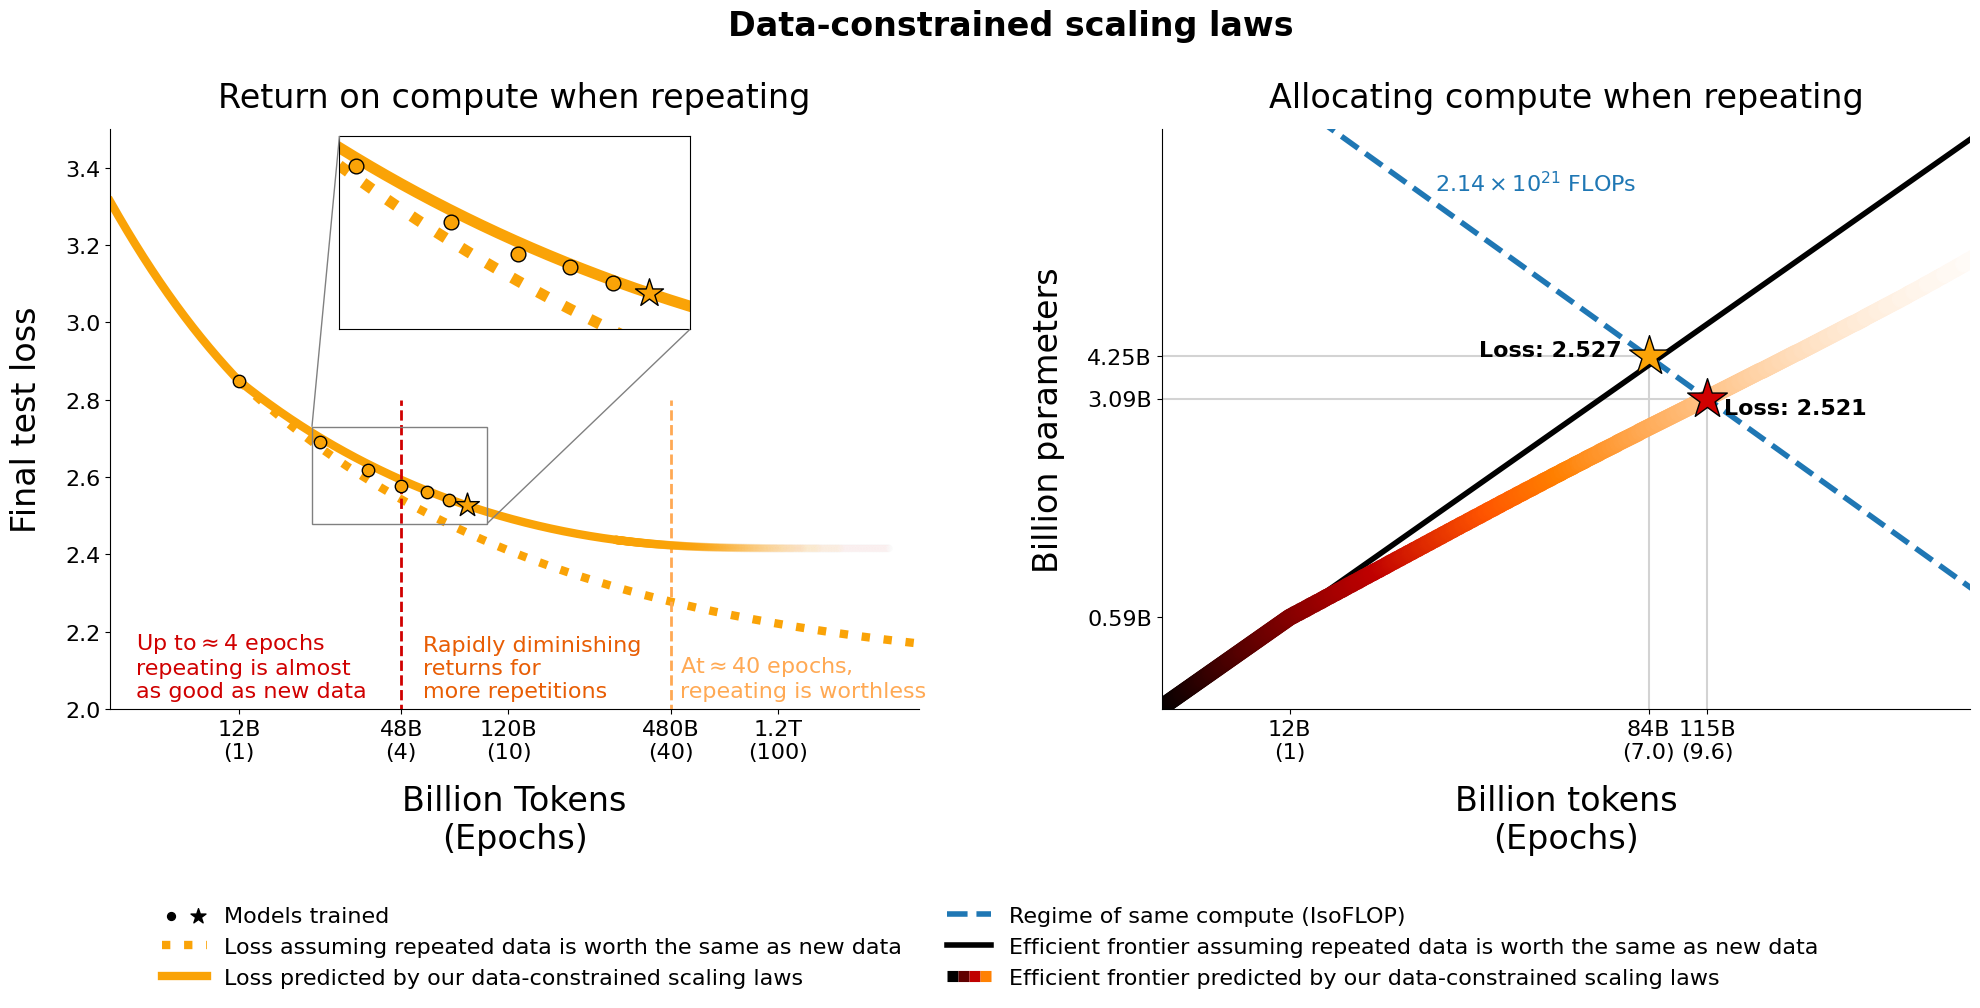

In [ ]:
from matplotlib.cm import unregister_cmap
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


random.seed(42)
np.random.seed(42)

FONTSIZE = 24
FONTSIZE_SMALL = 16

fig, axes = plt.subplots(figsize=(24, 10), ncols=2)

ax_rtn = axes[0]
ax = axes[1]

ax_rtn.set_title(r'Return on compute when repeating', fontsize=FONTSIZE, pad=16)
ax.set_title(r'Allocating compute when repeating', fontsize=FONTSIZE, pad=16)

fig.suptitle('Data-constrained scaling laws', fontsize=FONTSIZE, fontweight="bold", y=1)
 
COLS = [
    "#D00000",
    "#E85D04",
    "#FAA307",
]


UT = 12e9

####################

x = np.linspace(1e9, 100e12, 10000)
x = np.logspace(np.log10(1e9), np.log10(100e12), 10000)
fm = sorted([(t, l) for t, ut, m, l, n in zip(tokens, unique_tokens, model_params, losses, names) if ((m == PARAMS_MAP["4b2"]) and (ut == UT))])

new_start_point = NAMES_TO_VAL_LOSSES["4b212b12b"]# 2.848890E+00 # "4b212b12b"
new_end_point = NAMES_TO_VAL_LOSSES["4b284b84b"]#2.456530E+00 # "4b284b84b"

start_point = loss_fn(PARAMS_MAP["4b2"], 12e9)
end_point = loss_fn(PARAMS_MAP["4b2"], 84e9)

# https://stackoverflow.com/questions/929103/convert-a-number-range-to-another-range-maintaining-ratio
old_range = start_point - end_point
new_range = new_start_point - new_end_point

new_cc_values = [
    (((loss_fn(PARAMS_MAP["4b2"], i[0]) - end_point) * new_range) / old_range) + new_end_point for i in fm
]

new_cc_curve = [
    (((loss_fn(PARAMS_MAP["4b2"], i) - end_point) * new_range) / old_range) + new_end_point for i in x
]

new_start_point = NAMES_TO_VAL_LOSSES["4b212b12b"]#2.848890 # "4b212b12b"
new_end_point = NAMES_TO_VAL_LOSSES["4b284b12b"]#2.526961 # "4b284b12b"

start_point = scaling_law(PARAMS_MAP["4b2"], 12e9, 12e9, [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363])
end_point = scaling_law(PARAMS_MAP["4b2"], 84e9, 12e9, [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363])

# https://stackoverflow.com/questions/929103/convert-a-number-range-to-another-range-maintaining-ratio
old_range = start_point - end_point
new_range = new_start_point - new_end_point
    
new_dc_values = [
    (((scaling_law(PARAMS_MAP["4b2"], i[0], min(i[0], 12e9), [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363]) - end_point) * new_range) / old_range) + new_end_point for i in fm
]

new_dc_curve = [
    (((scaling_law(PARAMS_MAP["4b2"], i, min(i, 12e9), [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363]) - end_point) * new_range) / old_range) + new_end_point for i in x    
]


x_ticks = [100e5, 100e6, 100e7, 100e8, 100e9, 100e10, 100e11, 100e12]
#x_ticks_loc = [np.log10(x) for x in x_ticks]
x_ticks_str = ["$10^{7}$", "$10^{8}$", "$10^{9}$", "$10^{10}$", "$10^{11}$", "$10^{12}$", "$10^{13}$", "$10^{14}$"]
x_ticks_str = ["10M", "100M", "1B", "10B", "100B", "1T", "10T", "100T"]

x_ticks = [12e9, 48e9, 120e9, 480e9, 1.2e12]
x_ticks_str = ["12B\n(1)", "48B\n(4)", "120B\n(10)", "480B\n(40)", "1.2T\n(100)"]
x_ticks = [np.log10(x) for x in x_ticks]
ax_rtn.set_xticks(x_ticks, x_ticks_str)


#ax_rtn.set_xlim(np.log10(1e9), np.log10(10e12))
ax_rtn.set_xlim(np.log10(4e9), np.log10(4e12))
ax_rtn.set_ylim(2.0, 3.5)

ax_rtn.set_xlabel("Billion Tokens\n(Epochs)", fontsize=FONTSIZE, labelpad=16)
ax_rtn.set_ylabel("Final test loss", fontsize=FONTSIZE, labelpad=16)

ax_rtn.scatter(
    np.log10([x[0] for x in fm if x[0] != 84e9]),
    #[x[0] for x in fm],
    [x[1] for x in fm if x[0] != 84e9], 
    label=r"Empirical loss", 
    color=COLS[-1],#"#1f77b4",
    marker=".",
    s=256+64,
    zorder=10,
    edgecolor="black",    
)

ax_rtn.scatter(
    np.log10([x[0] for x in fm if x[0] == 84e9]),
    #[x[0] for x in fm],
    [x[1] for x in fm if x[0] == 84e9], 
    #label=r"Empirical loss", 
    color=COLS[-1],#"#1f77b4",
    marker="*",
    s=256+64,
    zorder=10,
    edgecolor="black",
)

"""
ax_rtn.plot(
    np.log10(x),
    #x,
    new_dc_curve, 
    label=r"Loss predicted by our data-constrained scaling laws",
    color=COLS[-1],#"black", #"#1f77b4",
    #color="green"
    linewidth=6.0,    
)
"""
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.colors as colors

ax_rtn.plot(
    np.log10([i for i in x if i<300e9]),
    #x,
    [d for d, i in zip(new_dc_curve, x) if i<300e9], 
    label=r"Loss predicted by our data-constrained scaling laws",
    color=COLS[-1],#"black", #"#1f77b4",
    #color="green"
    linewidth=6.0,    
)


#x2 = [i for i in x if (i>480e9)]# and (12.602059991327963>np.log10(i))]
#dc2 = [d for d, i in zip(new_dc_curve, x) if (i>480e9) and (12.602059991327963>np.log10(i))]
x2 = np.logspace(np.log10(300e9), np.log10(4e12), 500)
dc2 = [
    (((scaling_law(PARAMS_MAP["4b2"], i, min(i, 12e9), [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363]) - end_point) * new_range) / old_range) + new_end_point for i in x2    
]

#redfade = colors.to_rgb(COLS[-1]) + (0.0,)
#myred = colors.LinearSegmentedColormap.from_list('my', [redfade, COLS[-1]])

#alpha_arr = np.linspace(0.2, 0.0, len(dc2))
alpha_arr = np.logspace(np.log10(1.0), np.log10(0.001), len(dc2))
from matplotlib.colors import to_rgb, to_rgba
r, g, b = to_rgb(COLS[-1])
# r, g, b, _ = to_rgba(color)
#x = np.random.rand(len(dc2))
#y = np.random.rand(len(dc2))
#alpha_arr = x * y
color = [(r, g, b, alpha) for alpha in alpha_arr]
#'''
ax_rtn.scatter(
    np.log10(x2),
    dc2,
    s=26, 
    #color='black', 
    #label="Data-constrained Scaling Laws",
    c=color,#np.linspace(1, 0, len(dc2)),#np.log10(x2),
    #cmap=myred,
    zorder=10,
    #edgecolor="black",
    #linewidth=0.2,
)
#'''
""" Line segment messes with the color somehow - it is not the exact same color as the line..
#x_end = ax_rtn.get_xlim()[-1]
#x2 = [i for i in x if (i>480e9) and (np.log10(i) < x_end)]
#dc2 = [d for d, i in zip(new_dc_curve, x) if (i>480e9) and (np.log10(i) < x_end)]

redfade = colors.to_rgb(COLS[-1]) + (0.5,)
myred = colors.LinearSegmentedColormap.from_list('my', [redfade, COLS[-1]])

#x = np.linspace(0.0, 1.0, 1000)
#x = np.log10(x)
#y    = np.sin(x * 4 * np.pi)
alphas = np.linspace(1, 0, len(dc2))#np.log10(x2)#np.linspace(0.0, 1.0, 1000)#x * -4#% 1
#alphas = np.logspace(np.log10(1), np.log10(0.5), len(dc2))
points = np.vstack((np.log10(x2), dc2)).T.reshape(-1, 1, 2)
segments = np.hstack((points[:-1], points[1:]))

#fig, ax = plt.subplots()
lc = LineCollection(segments, array=alphas, cmap=myred, lw=6.0, label="Loss predicted by our data-constrained scaling laws")
line = ax_rtn.add_collection(lc)
"""
ax_rtn.plot(
    np.log10([i for i in x if i>UT]),
    #x,
    [c for c,i in zip(new_cc_curve, x) if i>UT], 
    label=r"Loss assuming repeated data is worth the same as new data", 
    color=COLS[-1],#"#1f77b4",
    linestyle="dotted",
    #color="red"
    linewidth=6.0,    
)

"""
lim_s, lim_e = ax.get_ylim()
l_end = scaling_law(PARAMS_MAP["4b2"], fm[-1][0], UT, params)
for ep in [1, 2, 4, 8, 16]:
    t = ep * UT
    #l = (scaling_law(PARAMS_MAP["4b2"], t, min(t, unique_toks), params)/l_start) * fm[0][1]
    #l = (scaling_law(PARAMS_MAP["4b2"], t, min(t, unique_toks), params)/l_end) * fm[-1][1]
    #l = scaling_law(PARAMS_MAP["4b2"], t, min(t, unique_toks), [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363])

    # Based on lim_s & lim_e bring l to a range from 0 to 1
    l = (((scaling_law(PARAMS_MAP["4b2"], t, min(t, 12e9), [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363]) - end_point) * new_range) / old_range) + new_end_point
    l_scaled = (l - lim_s) / (lim_e - lim_s)
    
    ax_rtn.axvline(x=np.log10(t), ymin=l_scaled-0.01, ymax=l_scaled+0.01, color='black', linestyle='-')
    #ax.axvline(x=t, ymin=l_scaled-0.01, ymax=l_scaled+0.01, color='black', linestyle='-')
    ax_rtn.annotate(f"{ep} Ep.", xy=(np.log10(t)+0.05, l+0.02))
    #ax.annotate(f"{ep} Ep.", xy=(t+0.05, l+0.02))
"""

ax_rtn.spines['right'].set_visible(False)
ax_rtn.spines['top'].set_visible(False)

ax_rtn.tick_params(labelsize=FONTSIZE_SMALL)


from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
axins = zoomed_inset_axes(ax_rtn, 2, loc="upper center")#loc=1,)

#axins.set_xlim(np.log10(4e9), np.log10(48e9))
#axins.set_ylim(2.0, 2.5)
#(1.9958130886056604, 4.4087605378109505)
#axins.set_xlim(9.602059991327963, 12.602059991327963)
axins.set_xlim(10.35, 11)
axins.set_ylim(2.48, 2.73)

axins.scatter(
    np.log10([x[0] for x in fm if x[0] != 84e9]),
    #[x[0] for x in fm],
    [x[1] for x in fm if x[0] != 84e9], 
    label=r"Empirical loss", 
    color=COLS[-1],#"#1f77b4",
    marker=".",
    s=256+64+64+64,
    zorder=10,
    edgecolor="black",    
)

axins.scatter(
    np.log10([x[0] for x in fm if x[0] == 84e9]),
    #[x[0] for x in fm],
    [x[1] for x in fm if x[0] == 84e9], 
    #label=r"Empirical loss", 
    color=COLS[-1],#"#1f77b4",
    marker="*",
    s=256+64+64+64,
    zorder=10,
    edgecolor="black",
)
#"""
axins.plot(
    np.log10(x),
    #x,
    new_dc_curve, 
    label=r"Loss predicted by our data-constrained scaling laws",
    color=COLS[-1],#"black", #"#1f77b4",
    #color="green"
    linewidth=8.0,    
)
#"""


axins.plot(
    np.log10([i for i in x if i>UT]),
    #x,
    [c for c,i in zip(new_cc_curve, x) if i>UT], 
    label=r"Loss assuming repeated data is worth the same as new data", 
    color=COLS[-1],#"#1f77b4",
    linestyle="dotted",
    #color="red"
    linewidth=8.0,
)

#axins.xticks(visible=False)
#axins.yticks(visible=False)
axins.get_xaxis().set_visible(False)
axins.get_yaxis().set_visible(False)

mark_inset(ax_rtn, axins, loc1=2, loc2=4, fc="none", ec="0.5", zorder=20,)
#axins.draw()


ax_rtn.annotate(
     r"Up to$\approx$4 epochs" + "\nrepeating is almost" + "\nas good as new data", 
     (np.log10(5e9), 2.03), 
     fontsize=FONTSIZE_SMALL, 
     color=COLS[0],#"#1f77b4",
     #weight='bold'
)
ax_rtn.vlines(x=np.log10(48e9), ymin=-10, ymax=2.8, color=COLS[0], zorder=5, linestyle='--', lw=2.0)

ax_rtn.annotate(
     "Rapidly diminishing" + "\nreturns for" + "\nmore repetitions", 
     (np.log10(48e9 + 10e9), 2.03), 
     fontsize=FONTSIZE_SMALL,
     color=COLS[1],
     #weight='bold'
)

#ax_rtn.vlines(x=np.log10(480e9), ymin=-10, ymax=2.8, color=COLS[0], zorder=5, linestyle='--', lw=2.0)
#ax_rtn.vlines(x=np.log10(480e9), ymin=-10, ymax=2.8, color="#6A040F", zorder=5, linestyle='--', lw=2.0)
ax_rtn.vlines(x=np.log10(480e9), ymin=-10, ymax=2.8, color="#ffa954", zorder=5, linestyle='--', lw=2.0)

ax_rtn.annotate(
     r"At$\approx$40 epochs," + "\nrepeating is worthless", 
     (np.log10(480e9 + 40e9), 2.03), 
     fontsize=FONTSIZE_SMALL, 
     color="#ffa954"#"#6A040F",#COLS[0],
     #weight='bold'
)


#axins.set_xlim(0, 30e9)
#axins.set_ylim(2.0, 3.0)
"""
ax_rtn.annotate(
    'Repeating is\nalmost as good\nas new data',#'Repeated data is almost as good as\nnew data for few epochs', 
    xy=(0.33, 0.46), 
    xytext=(0.38, 0.50),
    xycoords='axes fraction', 
    fontsize=FONTSIZE_SMALL,
    fontweight="bold",
    ha='center', va='bottom',
    #bbox=dict(boxstyle='square', fc='white'),
    arrowprops=dict(arrowstyle='-[, widthB=4', lw=2.0),
    rotation=339,
)
ax_rtn.annotate(
    'Repeating is\nworthless',#'Repeated data is almost as good as\nnew data for few epochs', 
    xy=(0.88, 0.32), 
    xytext=(0.88, 0.37),
    xycoords='axes fraction', 
    fontsize=FONTSIZE_SMALL,
    fontweight="bold",
    ha='center', va='bottom',
    #bbox=dict(boxstyle='square', fc='white'),
    arrowprops=dict(arrowstyle='-[, widthB=4', lw=2.0),
    rotation=360,
)
"""


#legend = ax_rtn.legend(
#    loc="lower center",
#    frameon=False,
#
#)    
    


#####################




UT = 12e9
P = optimal_N(D_to_C(UT))

base_model = "4b284b12b"
base_l = NAMES_TO_VAL_LOSSES[base_model]
base_p = PARAMS_MAP["4b2"] / P
base_e = (41_015_625 * 2048) / UT
print(6 * PARAMS_MAP["4b2"] * 41_015_625 * 2048)

#opt_model = "4b284b12bopt"
opt_model = "4b284b12bc4opt4"#"4b284b12bopt4"
best_l = NAMES_TO_VAL_LOSSES[opt_model]
best_p = 3.089856e9 / P#3.1e9 / P#PARAMS_MAP["3b8"] / P
best_e = (56_152_344 * 2048 / UT)#(48_828_125 * 2048) / UT
print(6 * 3.089856e9 * 56_152_344 * 2048)


#x_ticks = [1, 4, 30, 100] + [round(base_e, 1), round(best_e, 1)]
x_ticks = [1] + [round(base_e, 1), round(best_e, 1)]
x_ticks_loc = [np.log10(x) for x in x_ticks]
x_ticks = [f"{round(x*12)}B\n({x})" for x in x_ticks]

ax.set_xticks(x_ticks_loc, x_ticks)
ax.set_xlim(np.log10(0.5), np.log10(40))

#y_ticks = [1, 4, 10, 30, 100] + [base_p, best_p]
y_ticks = [1] + [base_p, best_p]

#y_ticks_str = [str(round(x*P))[:-6] + "M" for x in y_ticks]
#y_ticks_str = [str(round(x*P))[:-9] + "B" for x in y_ticks]
#y_ticks_str = [str(round(x*P))[:-9] + "B" if x != 1 else "0.6B" for x in y_ticks]
#y_ticks_str = ["0.59B", "2.4B", "5.9B", "18B", "59B", "4.2B", "3.1B"]
y_ticks_str = ["0.59B", "4.25B", "3.09B"]

y_ticks_loc = [np.log10(x) for x in y_ticks]
ax.set_yticks(y_ticks_loc, y_ticks_str)
ax.set_ylim(np.log10(0.5), np.log10(40))

ax.tick_params(labelsize=FONTSIZE_SMALL)

MIN_PARAMS, MAX_PARAMS = 100e6, 1e12
MIN_TOKS, MAX_TOKS = 100e6, 1e12

f_min = MIN_PARAMS * MIN_TOKS * 6
f_max = MAX_PARAMS * MAX_TOKS * 6

c_c4 = np.logspace(np.log10(f_min), np.log10(f_max), 1000)
toks_c4 = np.log10(np.array([optimal_D(x)/UT for x in c_c4]))
size_c4 = np.log10(np.array([optimal_N(x)/P for x in c_c4]))

ax.plot(toks_c4, size_c4, label=r"Efficient frontier assuming repeated data is worth the same as new data", color="black", linestyle="-", linewidth=4.0)

##1f77b4
ax.scatter([np.log10(base_e)], [np.log10(base_p)], s=900, marker='*', color=COLS[-1], edgecolor="black", zorder=10)
ax.annotate(f"Loss: {round(base_l, 3)}", (np.log10(base_e) - 0.4, np.log10(base_p)), fontsize=FONTSIZE_SMALL, weight='bold')


ax.scatter([np.log10(best_e)], [np.log10(best_p)], s=900, marker='*', color=COLS[-3], edgecolor="black", zorder=10)
ax.annotate(f"Loss: {round(best_l, 3)}", (np.log10(best_e) + 0.04, np.log10(best_p) - 0.05), fontsize=FONTSIZE_SMALL, weight='bold')

ax.vlines(x=np.log10(base_e), ymin=-10, ymax=np.log10(base_p), color='lightgrey', zorder=-1, linestyle='-')
ax.hlines(y=np.log10(base_p), xmin=-10, xmax=np.log10(base_e), color='lightgrey', zorder=-1, linestyle='-')

ax.vlines(x=np.log10(best_e), ymin=-10, ymax=np.log10(best_p), color='lightgrey', zorder=-1, linestyle='-')
ax.hlines(y=np.log10(best_p), xmin=-10, xmax=np.log10(best_e), color='lightgrey', zorder=-1, linestyle='-')


# Gridsearch for optimal values
#"""
toks_opt = []
size_opt = []
loss_opt = []

last_l = float("inf")
toks_c4 = np.array([optimal_D(x) for x in c_c4])
size_c4 = np.array([optimal_N(x) for x in c_c4])

start_t, end_t = ax.get_xlim()
start_s, end_s = ax.get_ylim()

for t, s in zip(toks_c4, size_c4):

    if not(start_t <= np.log10(t/UT) <= end_t) or not(start_s <= np.log10(s/P) <= end_s):
        continue

    min_l, min_t, min_s = scaling_law(s, t, min(UT, t), params), t, s
      
    for i in np.linspace(1.001, 3, 1000):
        D =  t*i
        U = min(UT, D)
        N = s/i

        new_l = scaling_law(N, D, U, params)
        if new_l < min_l:
            min_l, min_t, min_s = new_l, D, N

        D =  t/i
        U = min(UT, D)
        N = s*i
        
        new_l = scaling_law(N, D, U, params)
        if new_l < min_l:
            min_l, min_t, min_s = new_l, D, N
    
    if min_l >= last_l:
        print("Loss is not improving")
        break
    
    toks_opt.append(min_t / UT)
    size_opt.append(min_s / P)
    loss_opt.append(min_l)    

    last_l = min_l

ax.scatter(
    np.log10(toks_opt),
    np.log10(size_opt),
    s=128, 
    #color='black', 
    #label="Data-constrained Scaling Laws",
    c=loss_opt,
    cmap="gist_heat_r",
    zorder=2,
    #edgecolor="black",
    #linewidth=0.2,
)

ax.plot(
    [],#np.log10([t for t,l in zip(toks_opt, loss_opt) if not(Z.min() <= l <= Z.min() + 1)]),
    [],#np.log10([s for s,l in zip(size_opt, loss_opt) if not(Z.min() <= l <= Z.min() + 1)]),
    #s=128, 
    color='black', 
    label="Efficient frontier predicted by our data-constrained scaling laws",
    #c=[l for l in loss_opt if not(Z.min() <= l <= Z.min() + 1)],
    #cmap=outer_cmap,#contours.cmap,
    #zorder=2,
    #edgecolor="black",
    linewidth=8,
)


ax.scatter(
    [],
    [],
    color="black",
    marker=".",
    label="Models trained",
    s=128,
)
ax.scatter(
    [],
    [],
    color="black",
    marker="*",
    label="Models trained",
    s=128,
)

ax.plot(
    np.log10([base_e*0.01, best_e*100]),
    np.log10([base_p*100, best_p*0.01]),    
    linewidth=4.0,
    label="Regime of same compute (IsoFLOP)",
    linestyle="--",
)


ax.annotate(
    r'$2.14 \times 10^{21}$ FLOPs', 
    xy=(np.log10(4), np.log10(4)), 
    #xy=(np.log10(55e9 * 6), 2.21), 
    #xycoords='data',
    xytext=(np.log10(2.2), np.log10(25)),
    #xytext=(np.log10(10**12), 2.25), 
    textcoords='data',
    #va='top', ha='left',
    fontsize=FONTSIZE_SMALL,
    color="#1f77b4",
    #fontweight="bold",
    #arrowprops=dict(facecolor='black', shrink=0.05, width=2.5)
)


handles, labels = ax_rtn.get_legend_handles_labels()
handles_f, labels_f = ax.get_legend_handles_labels()

for h, l in zip(handles_f, labels_f):
    if ((h not in handles) and (l not in labels)) or (l == "Models trained"):
        handles.append(h)
        labels.append(l)

# Reorder
order = [
    'Models trained', "Loss assuming repeated data is worth the same as new data", "Loss predicted by our data-constrained scaling laws", 
    "Regime of same compute (IsoFLOP)", "Efficient frontier assuming repeated data is worth the same as new data", "Efficient frontier predicted by our data-constrained scaling laws", 
]
handles_ordered, labels_ordered = [], []
for o in order:
    for h, l in zip(handles, labels):
        if l == "Efficient frontier predicted by our data-constrained scaling laws":
            to_map = h
        if (l == "Models trained") and ("Models trained" in labels_ordered):
            idx = labels_ordered.index("Models trained")
            if isinstance(handles_ordered[idx], tuple): continue
            handles_ordered[idx] = (handles_ordered[idx], h)
            continue
        if l == o:
            handles_ordered.append(h)
            labels_ordered.append(l)
            if l != "Models trained":
                break

handles, labels = handles_ordered, labels_ordered


from matplotlib.legend_handler import HandlerLineCollection
from matplotlib.collections import LineCollection
# Make handles with gradient as well, but black seems fine
# https://stackoverflow.com/questions/49223702/adding-a-legend-to-a-matplotlib-plot-with-a-multicolored-line
class HandlerColorLineCollection(HandlerLineCollection):
    def create_artists(self, legend, artist ,xdescent, ydescent,
                        width, height, fontsize,trans):
        x = np.linspace(0,width,self.get_numpoints(legend)+1)
        y = np.zeros(self.get_numpoints(legend)+1)+height/2.-ydescent
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = LineCollection(segments, cmap='gist_heat',
                     transform=trans)
        lc.set_array(x)
        lc.set_linewidth(artist.get_linewidth())
        return [lc]

# https://stackoverflow.com/questions/31478077/how-to-make-two-markers-share-the-same-label-in-the-legend-using-matplotlib
from matplotlib.legend_handler import HandlerTuple
legend = fig.legend(
    handles, 
    labels, 
    loc="lower center",#(0.15,-0.1),#"lower center",#(0,-0.3), 
    ncol=2, 
    frameon=False, 
    fontsize=FONTSIZE_SMALL,
    handler_map={to_map: HandlerColorLineCollection(numpoints=4), tuple: HandlerTuple(ndivide=None)},
)

plt.subplots_adjust(wspace=0.3, bottom=0.3)#, right=0.9)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax.set_xlabel('Billion tokens\n(Epochs)', fontsize=FONTSIZE, labelpad=16)
ax.set_ylabel("Billion parameters", fontsize=FONTSIZE, labelpad=16)

plt.savefig(f"return_alloc.pdf", bbox_inches="tight", dpi=300)

plt.show()



##### Old plots

2.140236e+21
2.1320006494920376e+21


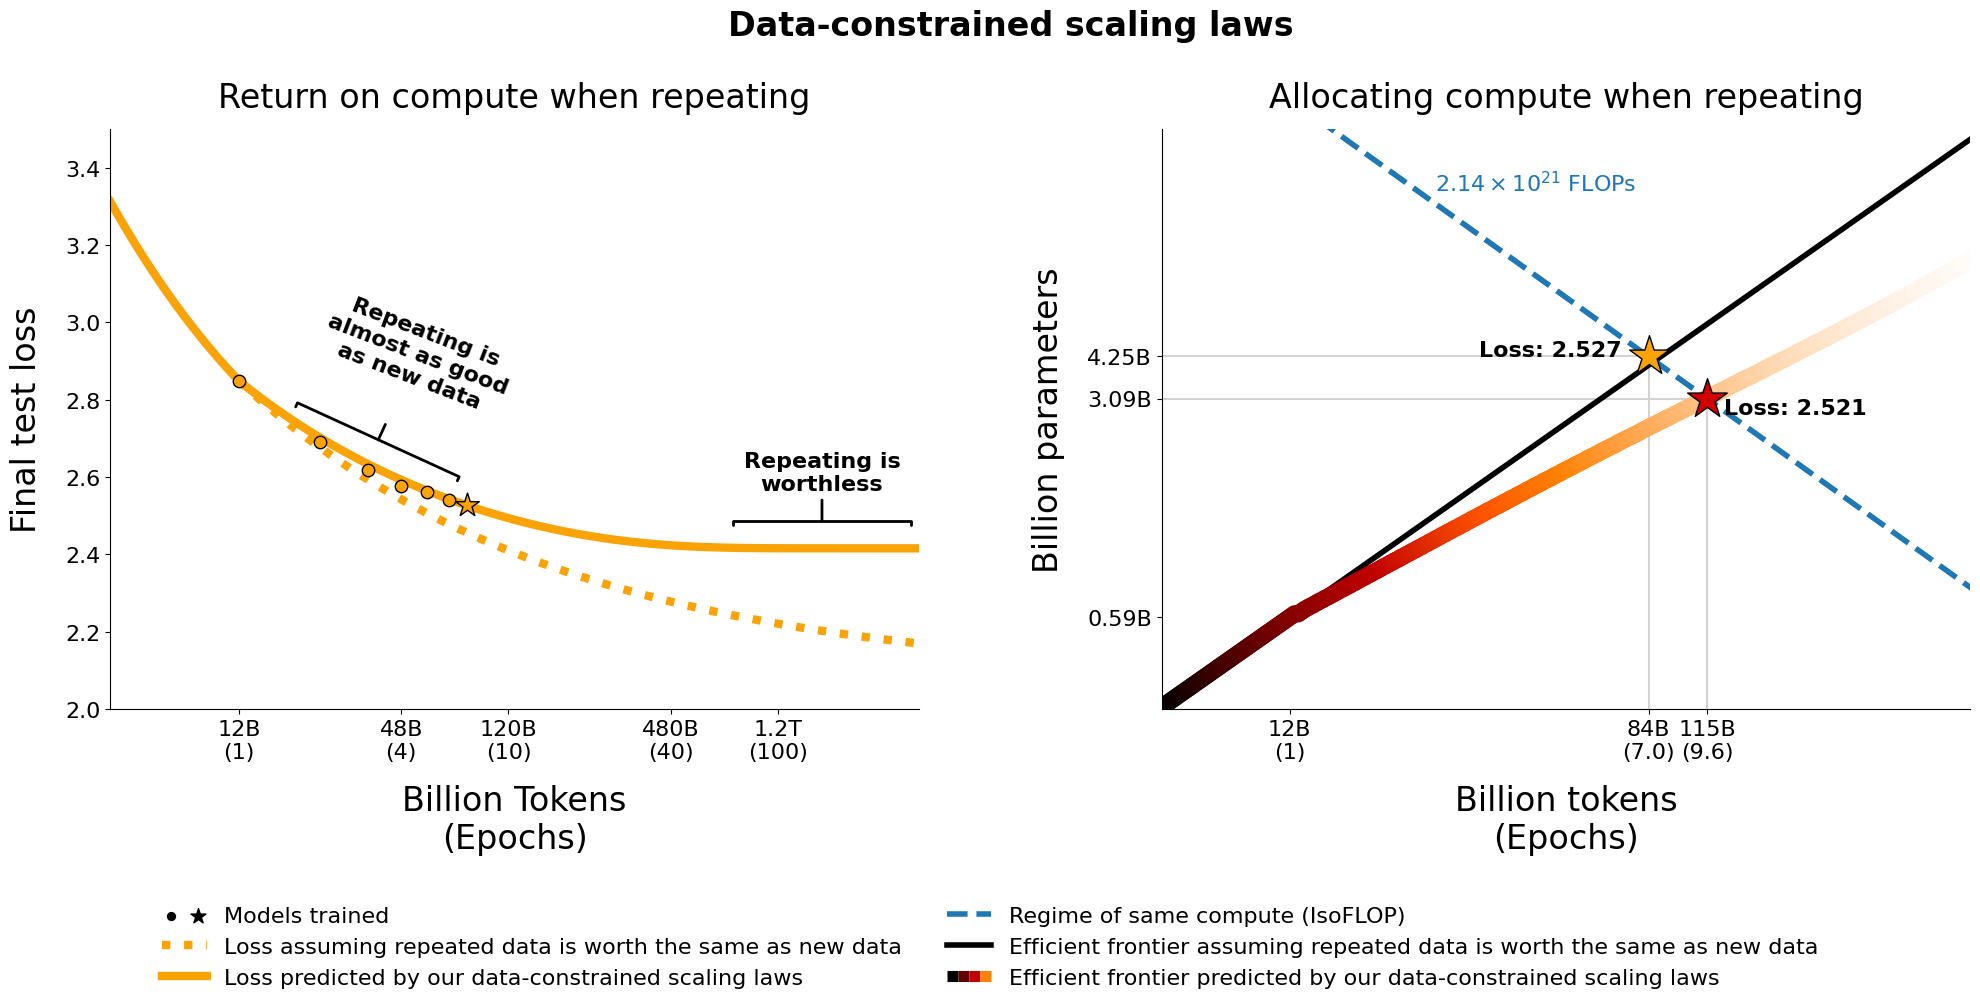

In [ ]:
from matplotlib.cm import unregister_cmap
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


random.seed(42)
np.random.seed(42)

FONTSIZE = 24
FONTSIZE_SMALL = 16

fig, axes = plt.subplots(figsize=(24, 10), ncols=2)

ax_rtn = axes[0]
ax = axes[1]

ax_rtn.set_title(r'Return on compute when repeating', fontsize=FONTSIZE, pad=16)
ax.set_title(r'Allocating compute when repeating', fontsize=FONTSIZE, pad=16)

fig.suptitle('Data-constrained scaling laws', fontsize=FONTSIZE, fontweight="bold", y=1)
 
COLS = [
    "#D00000",
    "#E85D04",
    "#FAA307",
]


UT = 12e9

####################

x = np.linspace(1e9, 100e12, 10000)
x = np.logspace(np.log10(1e9), np.log10(100e12), 10000)
fm = sorted([(t, l) for t, ut, m, l, n in zip(tokens, unique_tokens, model_params, losses, names) if ((m == PARAMS_MAP["4b2"]) and (ut == UT))])

new_start_point = NAMES_TO_VAL_LOSSES["4b212b12b"]# 2.848890E+00 # "4b212b12b"
new_end_point = NAMES_TO_VAL_LOSSES["4b284b84b"]#2.456530E+00 # "4b284b84b"

start_point = loss_fn(PARAMS_MAP["4b2"], 12e9)
end_point = loss_fn(PARAMS_MAP["4b2"], 84e9)

# https://stackoverflow.com/questions/929103/convert-a-number-range-to-another-range-maintaining-ratio
old_range = start_point - end_point
new_range = new_start_point - new_end_point

new_cc_values = [
    (((loss_fn(PARAMS_MAP["4b2"], i[0]) - end_point) * new_range) / old_range) + new_end_point for i in fm
]

new_cc_curve = [
    (((loss_fn(PARAMS_MAP["4b2"], i) - end_point) * new_range) / old_range) + new_end_point for i in x
]

new_start_point = NAMES_TO_VAL_LOSSES["4b212b12b"]#2.848890 # "4b212b12b"
new_end_point = NAMES_TO_VAL_LOSSES["4b284b12b"]#2.526961 # "4b284b12b"

start_point = scaling_law(PARAMS_MAP["4b2"], 12e9, 12e9, [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363])
end_point = scaling_law(PARAMS_MAP["4b2"], 84e9, 12e9, [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363])

# https://stackoverflow.com/questions/929103/convert-a-number-range-to-another-range-maintaining-ratio
old_range = start_point - end_point
new_range = new_start_point - new_end_point
    
new_dc_values = [
    (((scaling_law(PARAMS_MAP["4b2"], i[0], min(i[0], 12e9), [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363]) - end_point) * new_range) / old_range) + new_end_point for i in fm
]

new_dc_curve = [
    (((scaling_law(PARAMS_MAP["4b2"], i, min(i, 12e9), [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363]) - end_point) * new_range) / old_range) + new_end_point for i in x    
]


x_ticks = [100e5, 100e6, 100e7, 100e8, 100e9, 100e10, 100e11, 100e12]
#x_ticks_loc = [np.log10(x) for x in x_ticks]
x_ticks_str = ["$10^{7}$", "$10^{8}$", "$10^{9}$", "$10^{10}$", "$10^{11}$", "$10^{12}$", "$10^{13}$", "$10^{14}$"]
x_ticks_str = ["10M", "100M", "1B", "10B", "100B", "1T", "10T", "100T"]

x_ticks = [12e9, 48e9, 120e9, 480e9, 1.2e12]
x_ticks_str = ["12B\n(1)", "48B\n(4)", "120B\n(10)", "480B\n(40)", "1.2T\n(100)"]
x_ticks = [np.log10(x) for x in x_ticks]
ax_rtn.set_xticks(x_ticks, x_ticks_str)


#ax_rtn.set_xlim(np.log10(1e9), np.log10(10e12))
ax_rtn.set_xlim(np.log10(4e9), np.log10(4e12))
ax_rtn.set_ylim(2.0, 3.5)

ax_rtn.set_xlabel("Billion Tokens\n(Epochs)", fontsize=FONTSIZE, labelpad=16)
ax_rtn.set_ylabel("Final test loss", fontsize=FONTSIZE, labelpad=16)

ax_rtn.scatter(
    np.log10([x[0] for x in fm if x[0] != 84e9]),
    #[x[0] for x in fm],
    [x[1] for x in fm if x[0] != 84e9], 
    label=r"Empirical loss", 
    color=COLS[-1],#"#1f77b4",
    marker=".",
    s=256+64,
    zorder=10,
    edgecolor="black",    
)

ax_rtn.scatter(
    np.log10([x[0] for x in fm if x[0] == 84e9]),
    #[x[0] for x in fm],
    [x[1] for x in fm if x[0] == 84e9], 
    #label=r"Empirical loss", 
    color=COLS[-1],#"#1f77b4",
    marker="*",
    s=256+64,
    zorder=10,
    edgecolor="black",
)

ax_rtn.plot(
    np.log10(x),
    #x,
    new_dc_curve, 
    label=r"Loss predicted by our data-constrained scaling laws",
    color=COLS[-1],#"black", #"#1f77b4",
    #color="green"
    linewidth=6.0,    
)

ax_rtn.plot(
    np.log10([i for i in x if i>UT]),
    #x,
    [c for c,i in zip(new_cc_curve, x) if i>UT], 
    label=r"Loss assuming repeated data is worth the same as new data", 
    color=COLS[-1],#"#1f77b4",
    linestyle="dotted",
    #color="red"
    linewidth=6.0,    
)

"""
lim_s, lim_e = ax.get_ylim()
l_end = scaling_law(PARAMS_MAP["4b2"], fm[-1][0], UT, params)
for ep in [1, 2, 4, 8, 16]:
    t = ep * UT
    #l = (scaling_law(PARAMS_MAP["4b2"], t, min(t, unique_toks), params)/l_start) * fm[0][1]
    #l = (scaling_law(PARAMS_MAP["4b2"], t, min(t, unique_toks), params)/l_end) * fm[-1][1]
    #l = scaling_law(PARAMS_MAP["4b2"], t, min(t, unique_toks), [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363])

    # Based on lim_s & lim_e bring l to a range from 0 to 1
    l = (((scaling_law(PARAMS_MAP["4b2"], t, min(t, 12e9), [6.6229553, 7.5856404, 0.604038, 0.3724021, 0.36468068, 16.257626, 4.9642363]) - end_point) * new_range) / old_range) + new_end_point
    l_scaled = (l - lim_s) / (lim_e - lim_s)
    
    ax_rtn.axvline(x=np.log10(t), ymin=l_scaled-0.01, ymax=l_scaled+0.01, color='black', linestyle='-')
    #ax.axvline(x=t, ymin=l_scaled-0.01, ymax=l_scaled+0.01, color='black', linestyle='-')
    ax_rtn.annotate(f"{ep} Ep.", xy=(np.log10(t)+0.05, l+0.02))
    #ax.annotate(f"{ep} Ep.", xy=(t+0.05, l+0.02))
"""

ax_rtn.spines['right'].set_visible(False)
ax_rtn.spines['top'].set_visible(False)

ax_rtn.tick_params(labelsize=FONTSIZE_SMALL)

#"""
ax_rtn.annotate(
    'Repeating is\nalmost as good\nas new data',#'Repeated data is almost as good as\nnew data for few epochs', 
    xy=(0.33, 0.46), 
    xytext=(0.38, 0.50),
    xycoords='axes fraction', 
    fontsize=FONTSIZE_SMALL,
    fontweight="bold",
    ha='center', va='bottom',
    #bbox=dict(boxstyle='square', fc='white'),
    arrowprops=dict(arrowstyle='-[, widthB=4', lw=2.0),
    rotation=339,
)
ax_rtn.annotate(
    'Repeating is\nworthless',#'Repeated data is almost as good as\nnew data for few epochs', 
    xy=(0.88, 0.32), 
    xytext=(0.88, 0.37),
    xycoords='axes fraction', 
    fontsize=FONTSIZE_SMALL,
    fontweight="bold",
    ha='center', va='bottom',
    #bbox=dict(boxstyle='square', fc='white'),
    arrowprops=dict(arrowstyle='-[, widthB=4', lw=2.0),
    rotation=360,
)
#"""


#legend = ax_rtn.legend(
#    loc="lower center",
#    frameon=False,
#
#)    
    


#####################




UT = 12e9
P = optimal_N(D_to_C(UT))

base_model = "4b284b12b"
base_l = NAMES_TO_VAL_LOSSES[base_model]
base_p = PARAMS_MAP["4b2"] / P
base_e = (41_015_625 * 2048) / UT
print(6 * PARAMS_MAP["4b2"] * 41_015_625 * 2048)

#opt_model = "4b284b12bopt"
opt_model = "4b284b12bc4opt4"#"4b284b12bopt4"
best_l = NAMES_TO_VAL_LOSSES[opt_model]
best_p = 3.089856e9 / P#3.1e9 / P#PARAMS_MAP["3b8"] / P
best_e = (56_152_344 * 2048 / UT)#(48_828_125 * 2048) / UT
print(6 * 3.089856e9 * 56_152_344 * 2048)


#x_ticks = [1, 4, 30, 100] + [round(base_e, 1), round(best_e, 1)]
x_ticks = [1] + [round(base_e, 1), round(best_e, 1)]
x_ticks_loc = [np.log10(x) for x in x_ticks]
x_ticks = [f"{round(x*12)}B\n({x})" for x in x_ticks]

ax.set_xticks(x_ticks_loc, x_ticks)
ax.set_xlim(np.log10(0.5), np.log10(40))

#y_ticks = [1, 4, 10, 30, 100] + [base_p, best_p]
y_ticks = [1] + [base_p, best_p]

#y_ticks_str = [str(round(x*P))[:-6] + "M" for x in y_ticks]
#y_ticks_str = [str(round(x*P))[:-9] + "B" for x in y_ticks]
#y_ticks_str = [str(round(x*P))[:-9] + "B" if x != 1 else "0.6B" for x in y_ticks]
#y_ticks_str = ["0.59B", "2.4B", "5.9B", "18B", "59B", "4.2B", "3.1B"]
y_ticks_str = ["0.59B", "4.25B", "3.09B"]

y_ticks_loc = [np.log10(x) for x in y_ticks]
ax.set_yticks(y_ticks_loc, y_ticks_str)
ax.set_ylim(np.log10(0.5), np.log10(40))

ax.tick_params(labelsize=FONTSIZE_SMALL)

MIN_PARAMS, MAX_PARAMS = 100e6, 1e12
MIN_TOKS, MAX_TOKS = 100e6, 1e12

f_min = MIN_PARAMS * MIN_TOKS * 6
f_max = MAX_PARAMS * MAX_TOKS * 6

c_c4 = np.logspace(np.log10(f_min), np.log10(f_max), 1000)
toks_c4 = np.log10(np.array([optimal_D(x)/UT for x in c_c4]))
size_c4 = np.log10(np.array([optimal_N(x)/P for x in c_c4]))

ax.plot(toks_c4, size_c4, label=r"Efficient frontier assuming repeated data is worth the same as new data", color="black", linestyle="-", linewidth=4.0)

##1f77b4
ax.scatter([np.log10(base_e)], [np.log10(base_p)], s=900, marker='*', color=COLS[-1], edgecolor="black", zorder=10)
ax.annotate(f"Loss: {round(base_l, 3)}", (np.log10(base_e) - 0.4, np.log10(base_p)), fontsize=FONTSIZE_SMALL, weight='bold')


ax.scatter([np.log10(best_e)], [np.log10(best_p)], s=900, marker='*', color=COLS[-3], edgecolor="black", zorder=10)
ax.annotate(f"Loss: {round(best_l, 3)}", (np.log10(best_e) + 0.04, np.log10(best_p) - 0.05), fontsize=FONTSIZE_SMALL, weight='bold')

ax.vlines(x=np.log10(base_e), ymin=-10, ymax=np.log10(base_p), color='lightgrey', zorder=-1, linestyle='-')
ax.hlines(y=np.log10(base_p), xmin=-10, xmax=np.log10(base_e), color='lightgrey', zorder=-1, linestyle='-')

ax.vlines(x=np.log10(best_e), ymin=-10, ymax=np.log10(best_p), color='lightgrey', zorder=-1, linestyle='-')
ax.hlines(y=np.log10(best_p), xmin=-10, xmax=np.log10(best_e), color='lightgrey', zorder=-1, linestyle='-')


# Gridsearch for optimal values
#"""
toks_opt = []
size_opt = []
loss_opt = []

last_l = float("inf")
toks_c4 = np.array([optimal_D(x) for x in c_c4])
size_c4 = np.array([optimal_N(x) for x in c_c4])

start_t, end_t = ax.get_xlim()
start_s, end_s = ax.get_ylim()

for t, s in zip(toks_c4, size_c4):

    if not(start_t <= np.log10(t/UT) <= end_t) or not(start_s <= np.log10(s/P) <= end_s):
        continue

    min_l, min_t, min_s = scaling_law(s, t, min(UT, t), params), t, s
      
    for i in np.linspace(1.01, 3, 1000):
        D =  t*i
        U = min(UT, D)
        N = s/i

        new_l = scaling_law(N, D, U, params)
        if new_l < min_l:
            min_l, min_t, min_s = new_l, D, N

        D =  t/i
        U = min(UT, D)
        N = s*i
        
        new_l = scaling_law(N, D, U, params)
        if new_l < min_l:
            min_l, min_t, min_s = new_l, D, N
    
    if min_l >= last_l:
        print("Loss is not improving")
        break
    
    toks_opt.append(min_t / UT)
    size_opt.append(min_s / P)
    loss_opt.append(min_l)    

    last_l = min_l

ax.scatter(
    np.log10(toks_opt),
    np.log10(size_opt),
    s=128, 
    #color='black', 
    #label="Data-constrained Scaling Laws",
    c=loss_opt,
    cmap="gist_heat_r",
    zorder=2,
    #edgecolor="black",
    #linewidth=0.2,
)

ax.plot(
    [],#np.log10([t for t,l in zip(toks_opt, loss_opt) if not(Z.min() <= l <= Z.min() + 1)]),
    [],#np.log10([s for s,l in zip(size_opt, loss_opt) if not(Z.min() <= l <= Z.min() + 1)]),
    #s=128, 
    color='black', 
    label="Efficient frontier predicted by our data-constrained scaling laws",
    #c=[l for l in loss_opt if not(Z.min() <= l <= Z.min() + 1)],
    #cmap=outer_cmap,#contours.cmap,
    #zorder=2,
    #edgecolor="black",
    linewidth=8,
)


ax.scatter(
    [],
    [],
    color="black",
    marker=".",
    label="Models trained",
    s=128,
)
ax.scatter(
    [],
    [],
    color="black",
    marker="*",
    label="Models trained",
    s=128,
)

ax.plot(
    np.log10([base_e*0.01, best_e*100]),
    np.log10([base_p*100, best_p*0.01]),    
    linewidth=4.0,
    label="Regime of same compute (IsoFLOP)",
    linestyle="--",
)


ax.annotate(
    r'$2.14 \times 10^{21}$ FLOPs', 
    xy=(np.log10(4), np.log10(4)), 
    #xy=(np.log10(55e9 * 6), 2.21), 
    #xycoords='data',
    xytext=(np.log10(2.2), np.log10(25)),
    #xytext=(np.log10(10**12), 2.25), 
    textcoords='data',
    #va='top', ha='left',
    fontsize=FONTSIZE_SMALL,
    color="#1f77b4",
    #fontweight="bold",
    #arrowprops=dict(facecolor='black', shrink=0.05, width=2.5)
)


handles, labels = ax_rtn.get_legend_handles_labels()
handles_f, labels_f = ax.get_legend_handles_labels()

for h, l in zip(handles_f, labels_f):
    if ((h not in handles) and (l not in labels)) or (l == "Models trained"):
        handles.append(h)
        labels.append(l)

# Reorder
order = [
    'Models trained', "Loss assuming repeated data is worth the same as new data", "Loss predicted by our data-constrained scaling laws", 
    "Regime of same compute (IsoFLOP)", "Efficient frontier assuming repeated data is worth the same as new data", "Efficient frontier predicted by our data-constrained scaling laws", 
]
handles_ordered, labels_ordered = [], []
for o in order:
    for h, l in zip(handles, labels):
        if l == "Efficient frontier predicted by our data-constrained scaling laws":
            to_map = h
        if (l == "Models trained") and ("Models trained" in labels_ordered):
            idx = labels_ordered.index("Models trained")
            if isinstance(handles_ordered[idx], tuple): continue
            handles_ordered[idx] = (handles_ordered[idx], h)
            continue
        if l == o:
            handles_ordered.append(h)
            labels_ordered.append(l)
            if l != "Models trained":
                break

handles, labels = handles_ordered, labels_ordered


from matplotlib.legend_handler import HandlerLineCollection
from matplotlib.collections import LineCollection
# Make handles with gradient as well, but black seems fine
# https://stackoverflow.com/questions/49223702/adding-a-legend-to-a-matplotlib-plot-with-a-multicolored-line
class HandlerColorLineCollection(HandlerLineCollection):
    def create_artists(self, legend, artist ,xdescent, ydescent,
                        width, height, fontsize,trans):
        x = np.linspace(0,width,self.get_numpoints(legend)+1)
        y = np.zeros(self.get_numpoints(legend)+1)+height/2.-ydescent
        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        lc = LineCollection(segments, cmap='gist_heat',
                     transform=trans)
        lc.set_array(x)
        lc.set_linewidth(artist.get_linewidth())
        return [lc]

# https://stackoverflow.com/questions/31478077/how-to-make-two-markers-share-the-same-label-in-the-legend-using-matplotlib
from matplotlib.legend_handler import HandlerTuple
legend = fig.legend(
    handles, 
    labels, 
    loc="lower center",#(0.15,-0.1),#"lower center",#(0,-0.3), 
    ncol=2, 
    frameon=False, 
    fontsize=FONTSIZE_SMALL,
    handler_map={to_map: HandlerColorLineCollection(numpoints=4), tuple: HandlerTuple(ndivide=None)},
)

plt.subplots_adjust(wspace=0.3, bottom=0.3)#, right=0.9)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


ax.set_xlabel('Billion tokens\n(Epochs)', fontsize=FONTSIZE, labelpad=16)
ax.set_ylabel("Billion parameters", fontsize=FONTSIZE, labelpad=16)

plt.savefig(f"return_alloc.pdf", bbox_inches="tight")

plt.show()



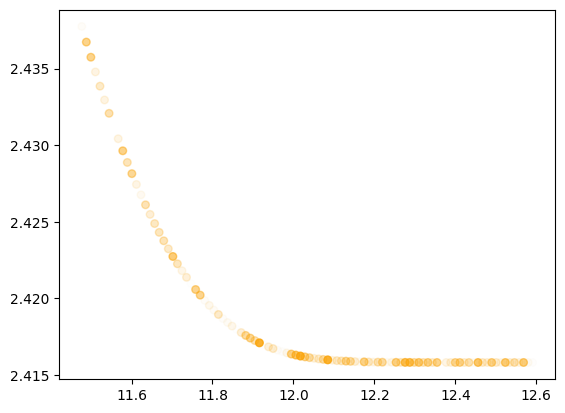

In [ ]:
from matplotlib.colors import to_rgb, to_rgba
r, g, b = to_rgb(COLS[-1])
# r, g, b, _ = to_rgba(color)
x = np.random.rand(len(dc2))
y = np.random.rand(len(dc2))
alpha_arr = x * y
#alpha_arr = 
color = [(r, g, b, alpha) for alpha in alpha_arr]
#'''
plt.scatter(
    np.log10(x2[::100]),
    dc2[::100],
    s=30,
    c=color[::100],
)


In [ ]:
color[::1000]

[(0.9803921568627451, 0.6392156862745098, 0.027450980392156862, 0.9),
 (0.9803921568627451, 0.6392156862745098, 0.027450980392156862, 0.9),
 (0.9803921568627451, 0.6392156862745098, 0.027450980392156862, 0.9),
 (0.9803921568627451, 0.6392156862745098, 0.027450980392156862, 0.9),
 (0.9803921568627451, 0.6392156862745098, 0.027450980392156862, 0.9),
 (0.9803921568627451, 0.6392156862745098, 0.027450980392156862, 0.9),
 (0.9803921568627451, 0.6392156862745098, 0.027450980392156862, 0.9),
 (0.9803921568627451, 0.6392156862745098, 0.027450980392156862, 0.9),
 (0.9803921568627451, 0.6392156862745098, 0.027450980392156862, 0.9),
 (0.9803921568627451, 0.6392156862745098, 0.027450980392156862, 0.9)]

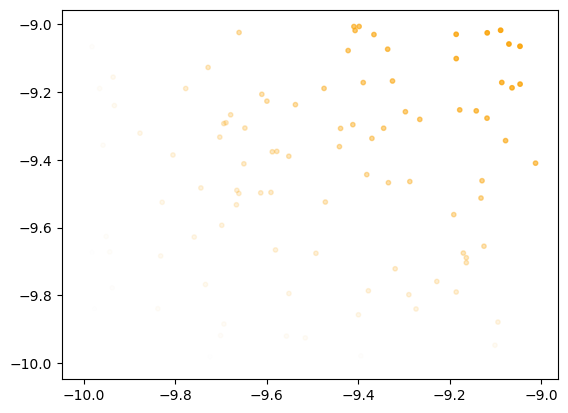

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb, to_rgba
import numpy as np

def scatter(x, y, color, alpha_arr, **kwarg):
    r, g, b = to_rgb(color)
    # r, g, b, _ = to_rgba(color)
    color = [(r, g, b, alpha) for alpha in alpha_arr]
    plt.scatter(x, y, c=color, **kwarg)

N = 100
x = np.random.rand(N)
y = np.random.rand(N)
alpha_arr = x * y
scatter(x-10, y-10, COLS[-1], alpha_arr, s=10) # ok
#scatter(x, y, '#efefef', alpha_arr, s=10) # ok

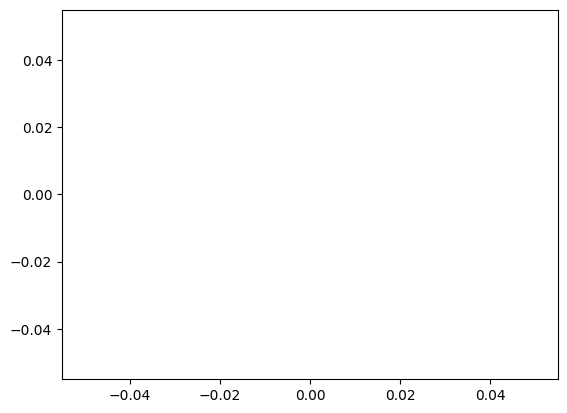

In [ ]:
fig, ax = plt.subplots()

x2 = [i for i in x if i>480e9]
dc2 = [d for d, i in zip(new_dc_curve, x) if i>480e9]
x2 = list(range(0, len(dc2)))
dc2 = list(range(0, len(dc2)))

redfade = colors.to_rgb(COLS[-1]) + (0.5,)
myred = colors.LinearSegmentedColormap.from_list('my', [redfade, COLS[-1]])

#x = np.linspace(0.0, 1.0, 1000)
#x = np.log10(x)

#y    = np.sin(x * 4 * np.pi)
alphas = np.linspace(1, 0, len(dc2))#np.log10(x2)#np.linspace(0.0, 1.0, 1000)#x * -4#% 1
points = np.vstack((np.log10(x2), dc2)).T.reshape(-1, 1, 2)
segments = np.hstack((points[:-1], points[1:]))

#fig, ax = plt.subplots()
lc = LineCollection(segments, array=alphas, cmap=myred, lw=6.0, label="Loss predicted by our data-constrained scaling laws")
line = ax.add_collection(lc)

ax.autoscale()
plt.show()

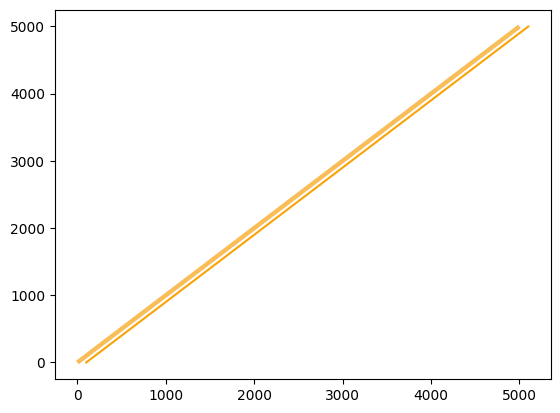

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.colors as colors

redfade = colors.to_rgb(COLS[-1]) + (1,)
myred = colors.LinearSegmentedColormap.from_list('my', [redfade, COLS[-1]])

x = list(range(0, len(dc2)))
y = list(range(0, len(dc2)))
#x    = np.linspace(0.0, len(dc2), len(dc2))
#y    = np.linspace(0.0, len(dc2), len(dc2))#x
x    = np.linspace(0.0, 5000, 5000)
y    = np.linspace(0.0, 5000, 5000)#x
alphas = np.linspace(1.0, 1.0, 5000)#% 1
#x = np.linspace(-1, 2.0, 1000)


points = np.vstack((x, y)).T.reshape(-1, 1, 2)
segments = np.hstack((points[:-1], points[1:]))

fig, ax = plt.subplots()
lc = LineCollection(segments, array=alphas, lw=3, color=COLS[-1])#cmap=myred
line = ax.add_collection(lc)

ax.plot(x+100, y, color=COLS[-1])

ax.autoscale()


plt.show()

In [ ]:
redfade

(0.9803921568627451, 0.6392156862745098, 0.027450980392156862, 1)

In [ ]:
len(dc2)

4638

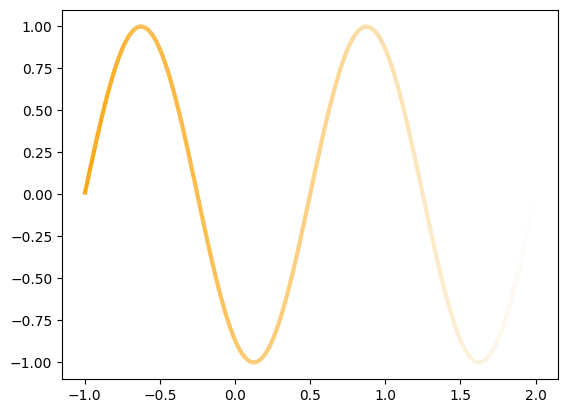

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.colors as colors

redfade = colors.to_rgb(COLS[-1]) + (0.0,)
myred = colors.LinearSegmentedColormap.from_list('my',[redfade, COLS[-1]])

x    = np.linspace(0.0, 1.0, 1000)
y    = np.sin(x * 4 * np.pi)
alphas = x * -1#% 1
x    = np.linspace(-1, 2.0, 1000)

points = np.vstack((x, y)).T.reshape(-1, 1, 2)
segments = np.hstack((points[:-1], points[1:]))

fig, ax = plt.subplots()
lc = LineCollection(segments, array=alphas, cmap=myred, lw=3)
line = ax.add_collection(lc)
ax.autoscale()
plt.show()

In [ ]:
x2 = [i for i in x if i>480e9]
dc2 = [d for d, i in zip(new_dc_curve, x) if i>480e9]

In [ ]:
x2

[480029720224.2244,
 480582748453.5856,
 481136413810.62775,
 481690717029.36914,
 482245658844.6676,
 482801239992.23364,
 483357461208.6252,
 483914323231.243,
 484471826798.3431,
 485029972649.0322,
 485588761523.2625,
 486148194161.84467,
 486708271306.44275,
 487268993699.5694,
 487830362084.5985,
 488392377205.7606,
 488955039808.13745,
 489518350637.67523,
 490082310441.1796,
 490646919966.3105,
 491212179961.5952,
 491778091176.42346,
 492344654361.0423,
 492911870266.571,
 493479739644.9863,
 494048263249.1373,
 494617441832.74036,
 495187276150.37415,
 495757766957.49475,
 496328915010.4205,
 496900721066.34705,
 497473185883.3426,
 498046310220.3424,
 498620094837.1623,
 499194540494.4934,
 499769647953.8971,
 500345417977.8183,
 500921851329.5803,
 501498948773.37964,
 502076711074.29944,
 502655138998.3042,
 503234233312.23474,
 503813994783.8215,
 504394424181.67944,
 504975522275.30273,
 505557289835.07837,
 506139727632.2809,
 506722836439.06696,
 507306617028.4893,
 50

In [ ]:
axins.get_xlim()

(8.75, 14.25)

In [ ]:
ax_rtn.get_xlim()

(9.602059991327963, 12.602059991327963)

In [ ]:
8.75**10

2630755761.6382837

In [ ]:
10**21 == 1e21

True

In [ ]:
2*10**21 == 2e21

True

In [ ]:
20**21

2097152000000000000000000000